# Исследование объявлений о продаже квартир

### Описание проекта
В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

### Описание данных
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### Изучим общую информацию. 

In [77]:
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [78]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [80]:
# взглянем на пропуски
# data.isna().sum()
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,38.8
floors_total,0.4
living_area,8.0
floor,0.0
is_apartment,88.3


In [81]:
# переименуем столбцы в соотвествии с хорошим стилем
data = data.rename(columns={"cityCenters_nearest": 'city_centers_nearest',
                            "parks_around3000": 'parks_around_3km',
                            "ponds_around3000": 'ponds_around_3km'})

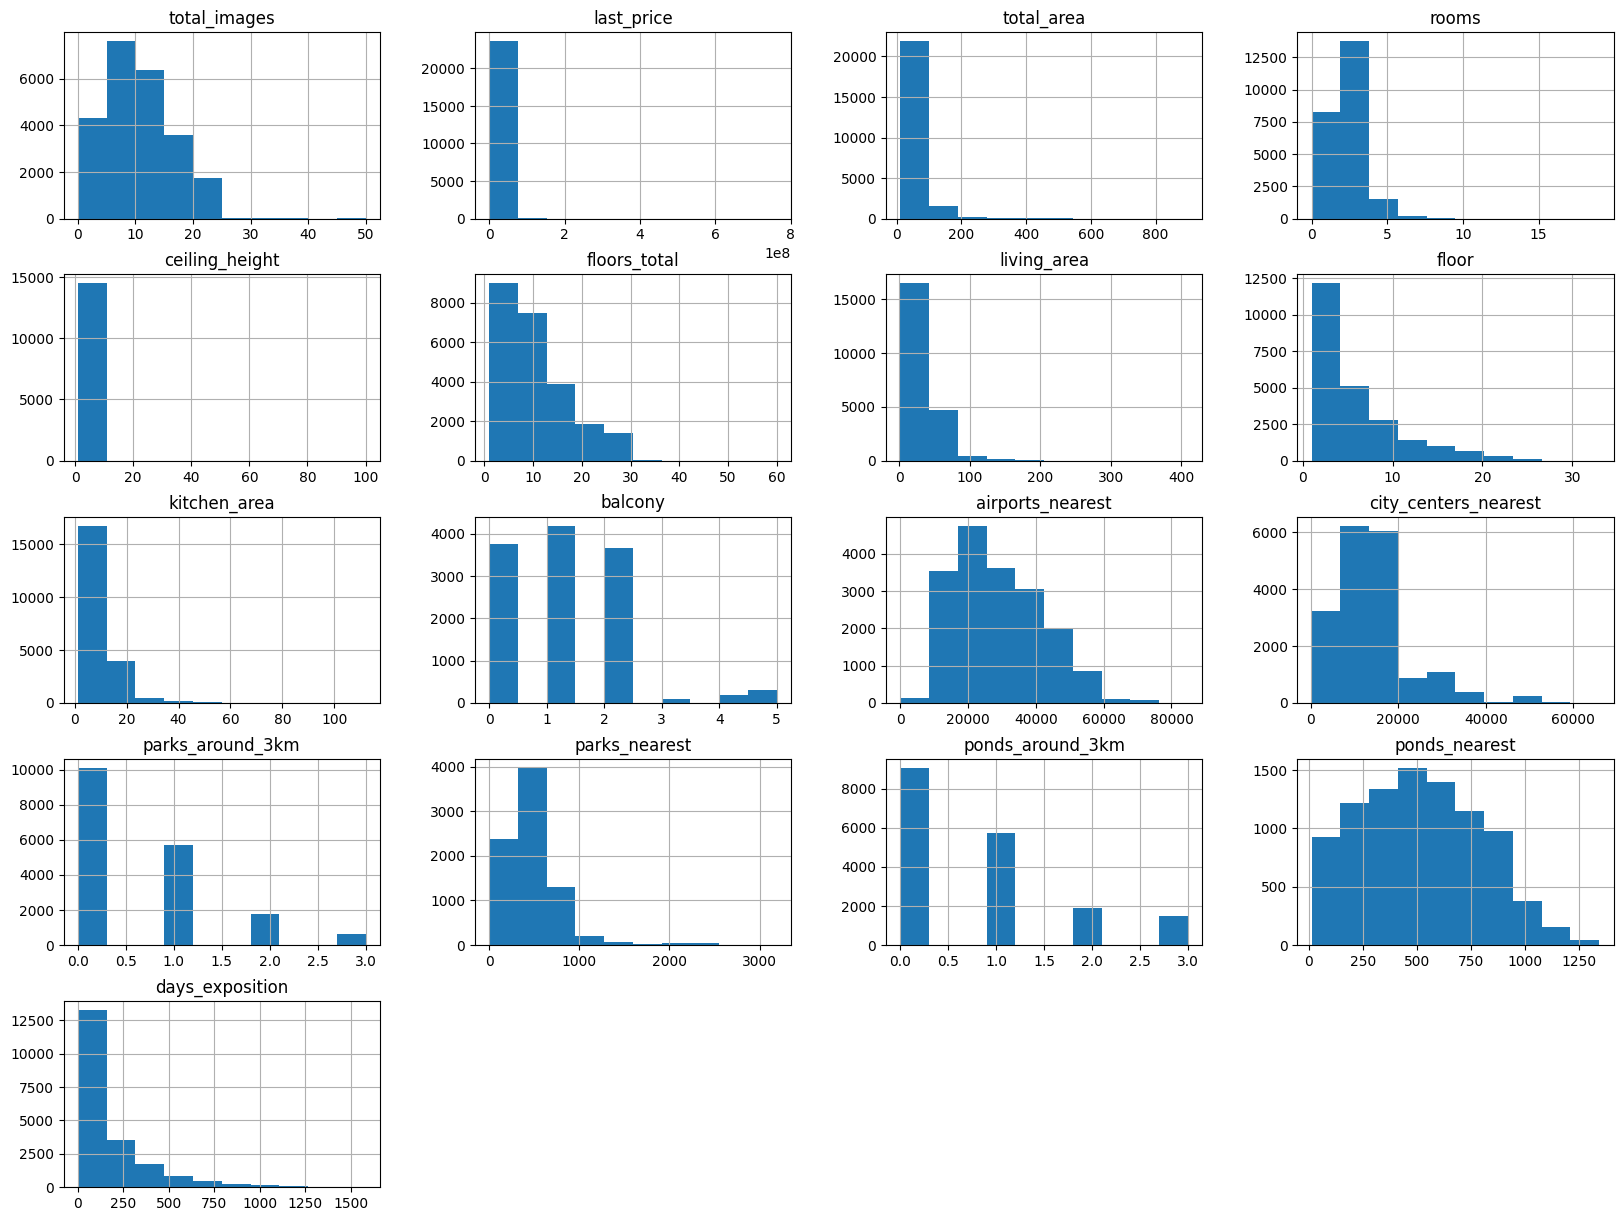

In [82]:
# взглянем на распределение частот колличественных переменных
data.hist(figsize=(20,15));

В процессе анализа данных выявлены следующие ключевые моменты:

Пропуски в данных:
- Высота потолков (ceiling_height): Пропуски составляют 38.8%. Это значительное количество, которое требует внимания, так как высота потолков может существенно влиять на восприятие и стоимость квартиры.
- Число балконов (balcony): Пропуски составляют 48.6%, что также высоко и может указывать на неполные данные по этому важному параметру.
- Тип квартиры (is_apartment): Пропуски составляют 88.3%. Это очень высокое значение, что может затруднить анализ, так как данная информация может быть ключевой для сегментации объектов.
- Площадь кухни (kitchen_area): Пропуски составляют 9.6%, что менее критично, но всё равно требует проверки и возможного заполнения.
- Жилая площадь (living_area): Пропуски составляют 8.0%, что также может оказать влияние на точность анализа, хотя и не является критическим.

Группа столбцов с пропусками схожей семантики:
- Расстояния до объектов (airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000): Пропуски варьируются от 23.3% до 23.4%. Эти данные являются важными для анализа местоположения и удобства.
- Ближайшие парки и пруды (parks_nearest, ponds_nearest): Пропуски составляют 65.9% и 61.6% соответственно. Эти столбцы имеют значительное количество пропусков и требуют особого внимания для корректного заполнения или учета в анализе.

Эти пропуски и их распределение указывают на необходимость дальнейшего уточнения данных и возможного использования методов для их заполнения или обработки, чтобы обеспечить более точный и надёжный анализ.

### Предобработка данных

#### Анализ значений столбца 'is_apartment'

In [83]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [84]:
# True and False and NaN
len(data['is_apartment'])

23699

In [85]:
# NaN
len(data[data['is_apartment'].isna()])

20924

In [86]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Судя по распределению значений, пропуски соответствуют значению False (т.к. мы рассматриваем жилую площадь)


In [87]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around_3km        float64
parks_nearest           float64
ponds_around_3km        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

#### Анализ значений столбца 'locality_name'

Значения этого столбца можно было бы удалить, т. к. это основополагающий критерий, и этих данных немного, но я решил сохранить их для сопоставления с другими признаками, характерными для квартир по сохранившимся характеристикам этих строк.

In [88]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3km         5518
parks_nearest           15620
ponds_around_3km         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [89]:
data['locality_name'] = data['locality_name'].fillna('unknown')

In [90]:
sorted(data['locality_name'].unique().tolist())

['unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское

In [91]:
# избавляемся от дубликатов
duplicate_name_list = ['деревня ',
     'городской поселок ', 
     'городской посёлок ',
     'городского типа ', 
     'городской  ', 
     'посёлок ', 
     'поселок ',
     'поселок городского типа ', 
     'посёлок городского типа ',
     'поселок станции ', 
     'посёлок станции ', 
     'посёлок при железнодорожной станции ',
     'поселок при железнодорожной станции ', 
     'село ', 
     'станции ',
     'садовое товарищество ',
     'садоводческое некоммерческое товарищество ',
     'коттеджный поселок ', 
     'коттеджный посёлок ', 
     'коттеджный ']

data['locality_name'] = data['locality_name'].replace(duplicate_name_list, '', regex=True)
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

#### Обработка пропусков в столбце 'ceiling_height'

In [92]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around_3km         5518
parks_nearest           15620
ponds_around_3km         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заменим пропуски высоты потолков не просто медианой, а высотой в зависимости от населенного пункта и общей площади объекта

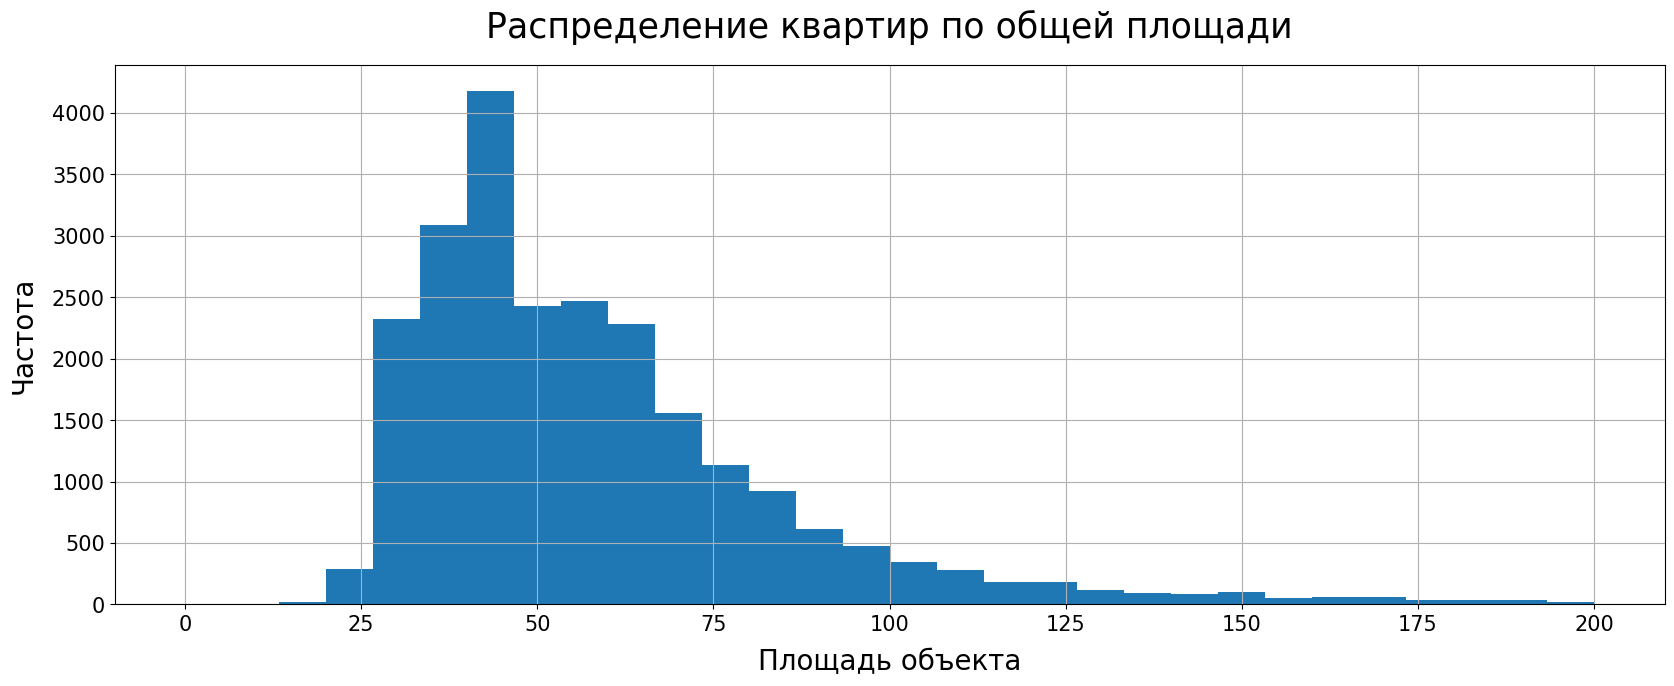

In [93]:
# еще раз взглянем на распределение общей площади
data['total_area'].hist(range=(0, 200), bins=30, figsize=(20, 7))

plt.grid(True)
plt.xlabel('Площадь объекта', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение квартир по общей площади', pad=20, fontsize=25);

In [94]:
# исходя из распределения разобьем выборку на характерные категории
def area_total(n):
    if 30 <= n <= 50:
        return 'средняя площадь'
    elif n < 30:
        return 'маленькая площадь'
    elif 50 < n <= 80:
        return 'большая площадь'
    elif n > 80:
        return 'очень большая площадь'

In [95]:
# добавим категориальный столбец в таблицу
data['area_category'] = data['total_area'].apply(area_total)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,area_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,очень большая площадь
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,средняя площадь
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,большая площадь
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,очень большая площадь
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,очень большая площадь


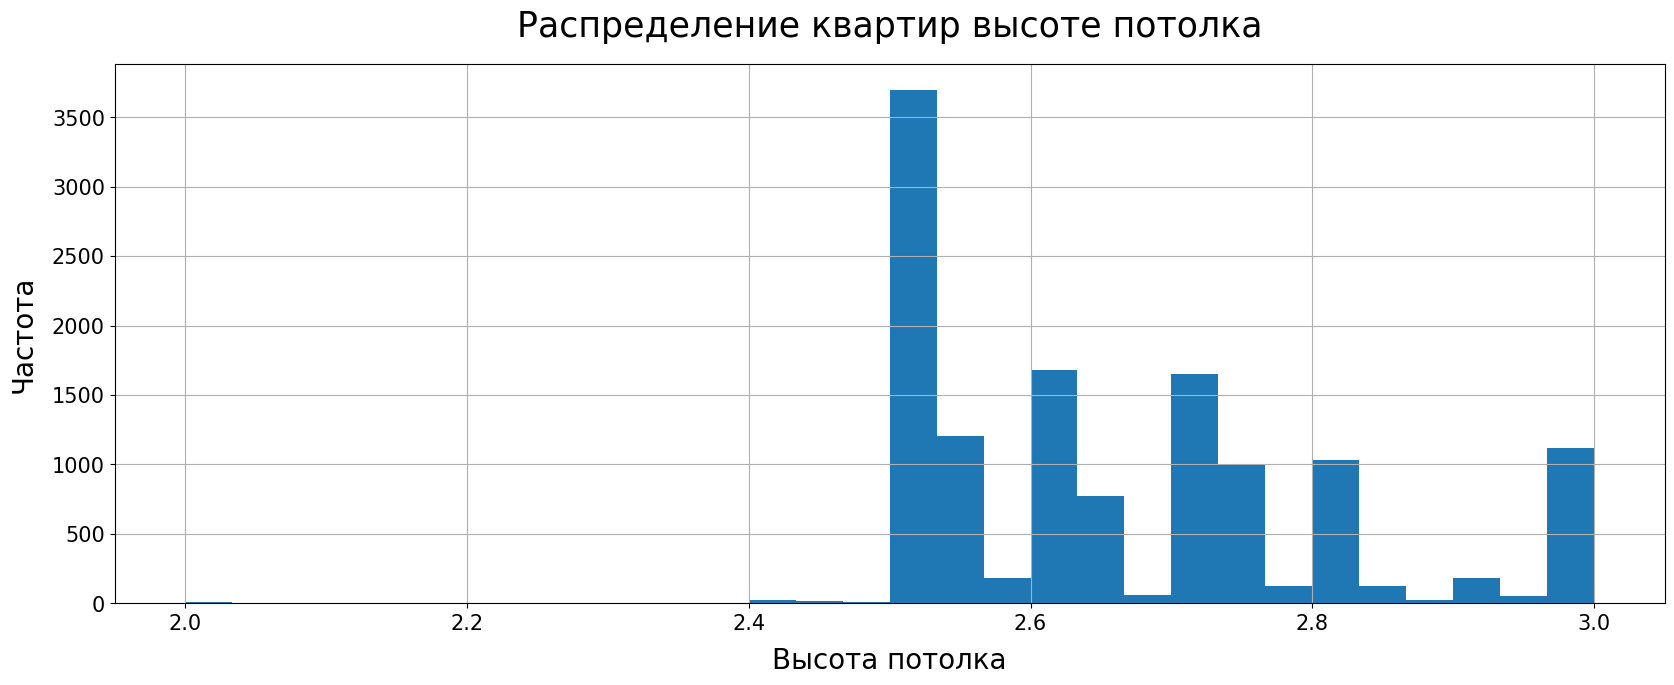

In [96]:
# посмотрим на распределение высоты потолков до замены пропусков
data['ceiling_height'].hist(range=(2, 3), bins=30, figsize=(20, 7))

plt.grid(True)
plt.xlabel('Высота потолка', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение квартир высоте потолка', pad=20, fontsize=25);

In [97]:
# создадим сводную таблицу по населенному пункту, категории площади и высоте потолков
pivot_ceiling_height = data.pivot_table(index=['locality_name', 'area_category'], values='ceiling_height', aggfunc='median')
pivot_ceiling_height = pivot_ceiling_height.reset_index()
pivot_ceiling_height

,locality_name,area_category,ceiling_height
0,unknown,большая площадь,2.750
1,unknown,маленькая площадь,2.750
2,unknown,очень большая площадь,3.000
3,unknown,средняя площадь,2.700
4,Агалатово,большая площадь,2.500
...,...,...,...
485,имени Свердлова,маленькая площадь,2.600
486,имени Свердлова,очень большая площадь,2.550
487,имени Свердлова,средняя площадь,2.525
488,при железнодорожной Вещево,маленькая площадь,2.500


In [98]:
# заменим пропуски в исходной таблице по характерным значениям из сводной таблицы по населенному пункту и общей площади
median_ceiling_height = pivot_ceiling_height.set_index(['locality_name', 'area_category'])['ceiling_height'].to_dict()

def ceiling_height(row):
    if pd.isna(row['ceiling_height']):
        key = (row['locality_name'], row['area_category'])
        return median_ceiling_height.get(key, row['ceiling_height'])
    else:
        return row['ceiling_height']

data['ceiling_height'] = data.apply(ceiling_height, axis=1)

data['ceiling_height'].isna().sum()

214

In [99]:
# оставшиеся пропуски заполним общей медианой
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

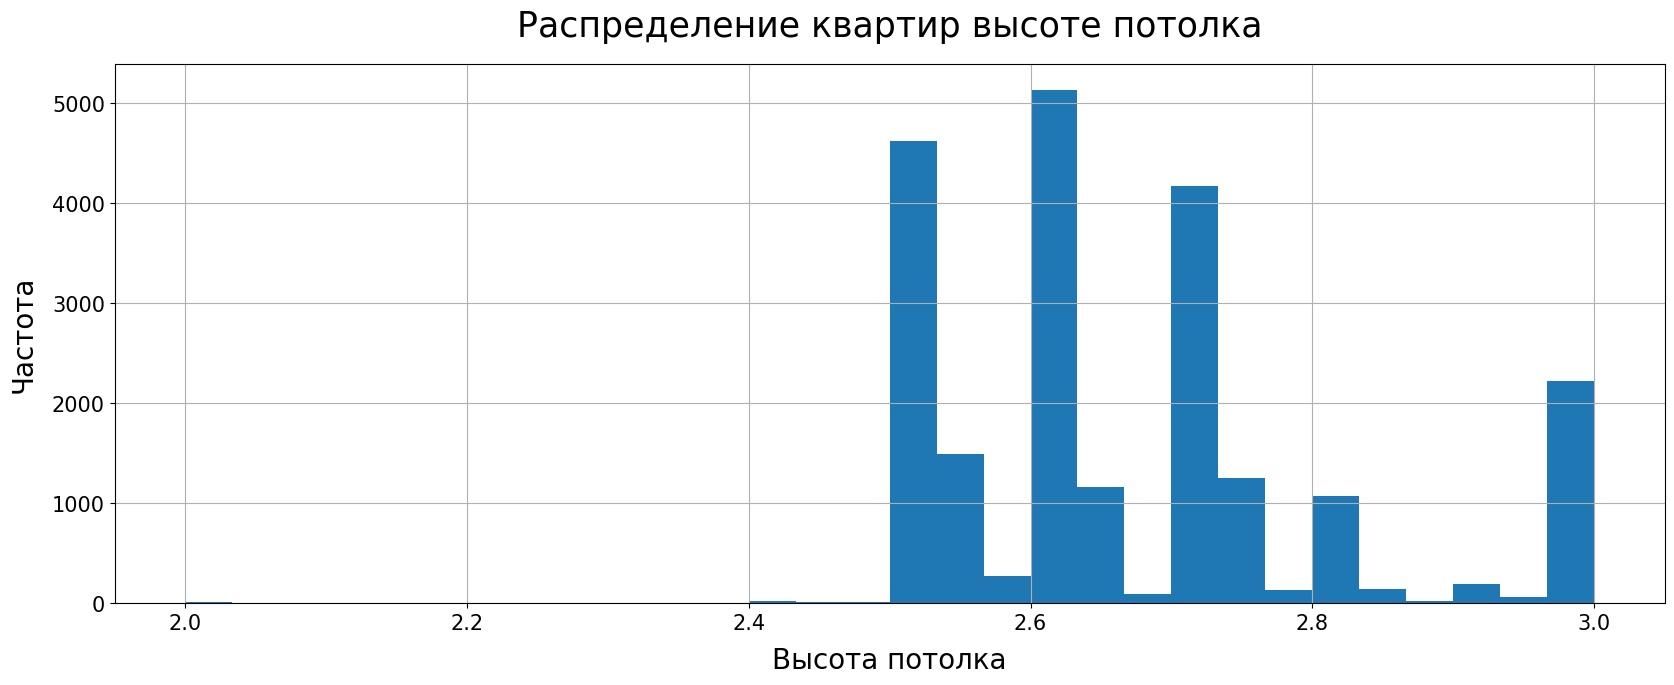

In [100]:
# посмотрим на распределение высоты потолков после замены пропусков
data['ceiling_height'].hist(range=(2, 3), bins=30, figsize=(20, 7))

plt.grid(True)
plt.xlabel('Высота потолка', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение квартир высоте потолка', pad=20, fontsize=25);

Распределение значительно изменилось. Наблюдается три пика в районе 2.5, 2.6 и 2.7 метров. 

#### Обработка пропусков в столбце 'floors_total'

Этих данных немного, можем смело избавиться от них 

In [101]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around_3km         5518
parks_nearest           15620
ponds_around_3km         5518
ponds_nearest           14589
days_exposition          3181
area_category               0
dtype: int64

In [102]:
data = data.dropna(subset=['floors_total'])

In [103]:
data['floors_total'].isna().sum()

0

#### Анализ значений столбца 'living_area'

In [104]:
data['living_area'].isna().sum()

1870

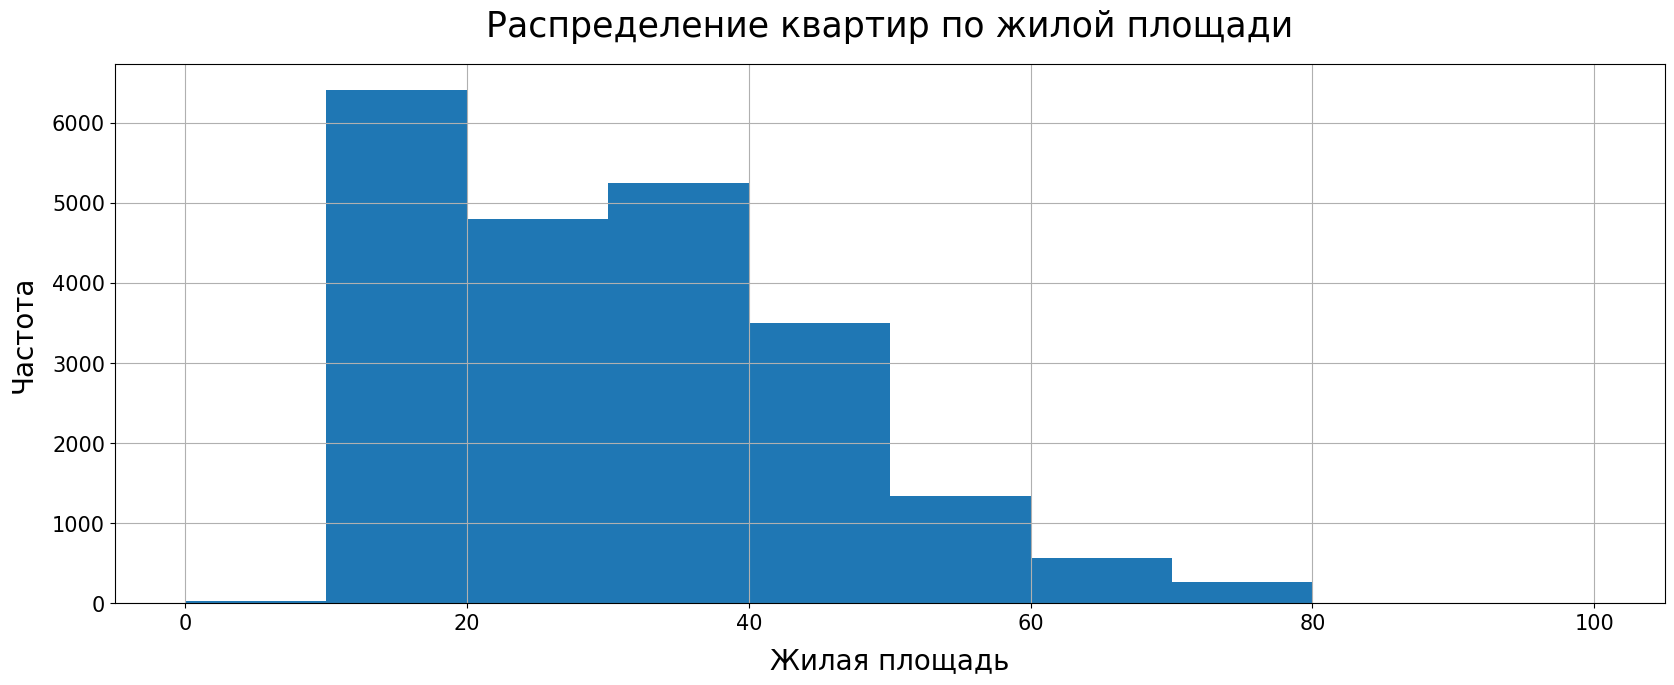

In [189]:
# распределение до заполнения пропусков
data['living_area'].hist(range=(0, 100), figsize=(20, 7))

plt.grid(True)
plt.xlabel('Жилая площадь', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение квартир по жилой площади', pad=20, fontsize=25);

In [106]:
# заполним пропуски в 'living_area' используя медианное отношение жилой площади к общей площади
data['living_area'] = data['living_area'].fillna(data['total_area'] * (data['living_area'] / data['total_area']).median())

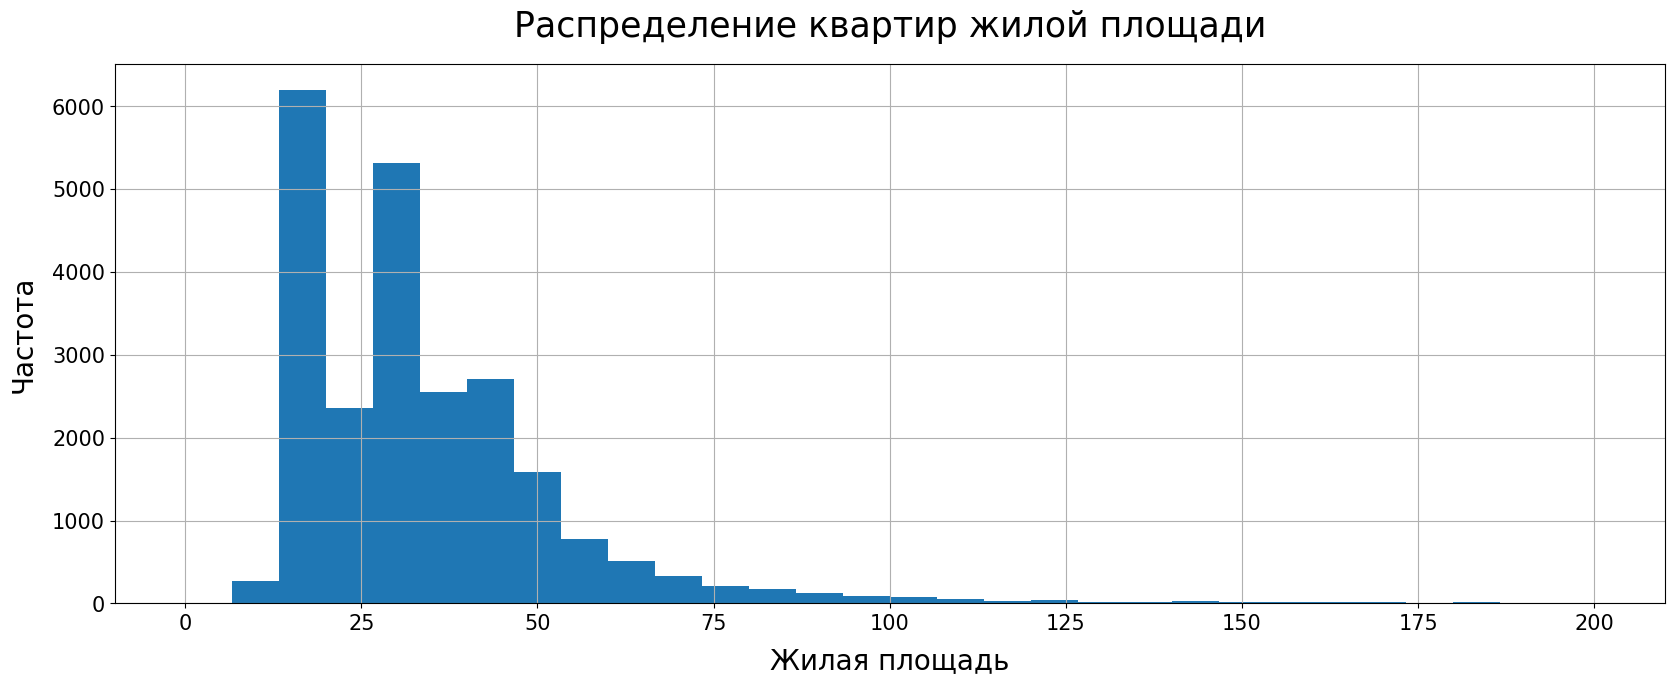

In [107]:
# распределение после заполнения пропусков
data['living_area'].hist(range=(0, 200), bins=30, figsize=(20, 7))

plt.grid(True)
plt.xlabel('Жилая площадь', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение квартир по жилой площади', pad=20, fontsize=25);

Распределение значительно изменилось. Наблюдается два пика в районе 20 и 30 метров.

#### Анализ значений столбца 'kitchen_area'

In [108]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name               0
airports_nearest         5532
city_centers_nearest     5509
parks_around_3km         5508
parks_nearest           15568
ponds_around_3km         5508
ponds_nearest           14552
days_exposition          3172
area_category               0
dtype: int64

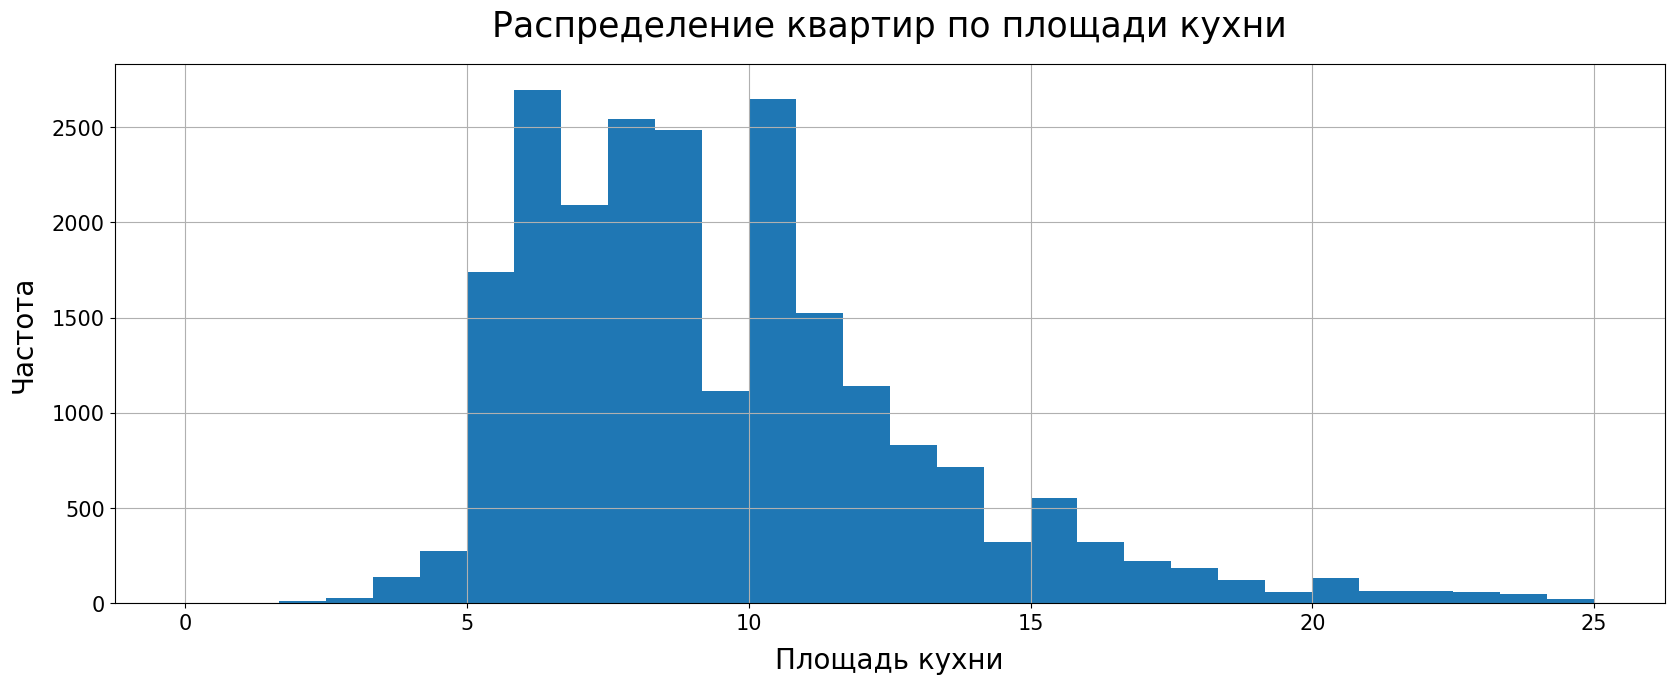

In [188]:
# распределение до заполнения пропусков
data['kitchen_area'].hist(range=(0, 25), bins=30, figsize=(20, 7), legend=False)
    
plt.grid(True)
plt.xlabel('Площадь кухни', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение квартир по площади кухни', pad=20, fontsize=25);

In [110]:
# заполним пропуски в 'kitchen_area' используя медианное отношение площади кухни к общей площади
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * (data['kitchen_area'] / data['total_area']).median())

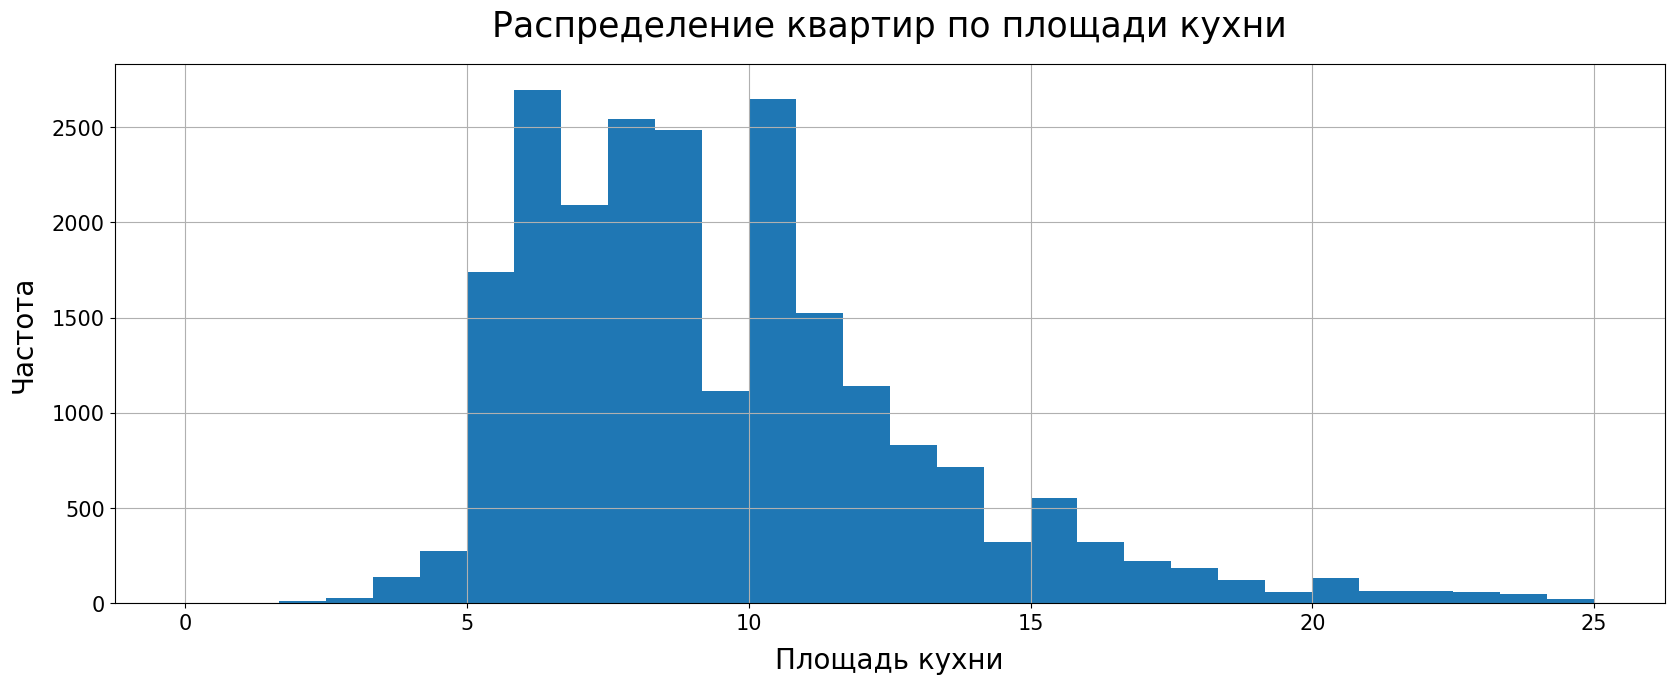

In [187]:
# распределение после заполнения пропусков
data['kitchen_area'].hist(range=(0, 25), bins=30, figsize=(20, 7))

plt.grid(True)
plt.xlabel('Площадь кухни', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение квартир по площади кухни', pad=20, fontsize=25);

Форма распределения сохранилась. Пики пропорционально повысили свои значения.

#### Анализ значений столбца 'balcony'

In [112]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11480
locality_name               0
airports_nearest         5532
city_centers_nearest     5509
parks_around_3km         5508
parks_nearest           15568
ponds_around_3km         5508
ponds_nearest           14552
days_exposition          3172
area_category               0
dtype: int64

In [113]:
data['balcony'].fillna(0, inplace=True)

In [114]:
data['balcony'].isna().sum()

0

Отсутствие значений в столбце означает отсутствие балконов в квартире.

 #### Анализ пропусков в стобцах 'airports_nearest', 'city_centers_nearest' , 'parks_around_3km', 'ponds_around_3km'

In [115]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5532
city_centers_nearest     5509
parks_around_3km         5508
parks_nearest           15568
ponds_around_3km         5508
ponds_nearest           14552
days_exposition          3172
area_category               0
dtype: int64

In [116]:
# строки с пропусками совпадают, значит, в этих местех нет парков и прудов в радиусе 3 км 
# и для этих же данных не хватает иформации до аэропорта и центра
len(data[(data['parks_around_3km'].isna()) &
     (data['ponds_around_3km'].isna()) &
     (data['airports_nearest'].isna()) &
     (data['city_centers_nearest'].isna())]
   )

5508

In [117]:
# пропуски означают отсутствие парков и прудов, заполняем их 0
data['parks_around_3km'] = data['parks_around_3km'].fillna(0)
data['ponds_around_3km'] = data['ponds_around_3km'].fillna(0)

In [118]:
# пропуски по расстоянию до центра заполняем медианой в зависимости от населенного пункта
for name in data['locality_name'].unique():
    data.loc[(data['locality_name'] == name) & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] = \
    data.loc[(data['locality_name'] == name), 'city_centers_nearest'].median()

In [119]:
# пропуски по расстоянию до аэропорта заполняем медианой в зависимости от населенного пункта
for name in data['locality_name'].unique():
    data.loc[(data['locality_name'] == name) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == name), 'airports_nearest'].median()

In [120]:
# оставшеся пропуски соответствют наслеленным пунктам, у которых нет поблизости города, их мы оставим
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5432
city_centers_nearest     5432
parks_around_3km            0
parks_nearest           15568
ponds_around_3km            0
ponds_nearest           14552
days_exposition          3172
area_category               0
dtype: int64

 #### Анализ типов данных в столбцах датафрейма

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23613 non-null  object 
 15  airports_nearest   

In [122]:
# столбец 'days_exposition' содердит NaN, который означает, что объявление еще активно, потому мы не будем заполнять эти пропуски
# и не будем приводить этот столбец к целочисленному типу 
data['days_exposition'].unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

In [123]:
# а для значений 'floors_total' и 'balcony' харайтерен целочисленных тип, т.к. они означают целое число
# приведем их к 'int'
for i in ['floors_total', 'balcony']:
    data[i] = pd.to_numeric(data[i], errors='coerce').astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  int32  
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  int32  
 14  locality_name         23613 non-null  object 
 15  airports_nearest   

### Посчитаем и добавим в таблицу новые столбцы

In [124]:
# приводим к 'datetime'
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [125]:
# цена за квадратный метр
data['price_1sqm'] = data['last_price'] / data['total_area']

In [126]:
# дни недели, месяц, год
data['week_day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [127]:
# расстояние до центра в километрах
data['city_centers_km'] = data['city_centers_nearest'] / 1000

In [128]:
# тип этажа
def floor_type(row):
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else: 
            return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

In [129]:
data[['first_day_exposition', 'price_1sqm', 'week_day', 'month', 'year', 'city_centers_km', 'floor_type']].head()

,first_day_exposition,price_1sqm,week_day,month,year,city_centers_km,floor_type
0,2019-03-07,120370.370370,3,3,2019,16.028,другой
1,2018-12-04,82920.792079,1,12,2018,18.603,первый
2,2015-08-20,92785.714286,3,8,2015,13.933,другой
3,2015-07-24,408176.100629,4,7,2015,6.800,другой
4,2018-06-19,100000.000000,1,6,2018,8.098,другой


### Проведем исследовательский анализ данных

#### Анализ общей площади

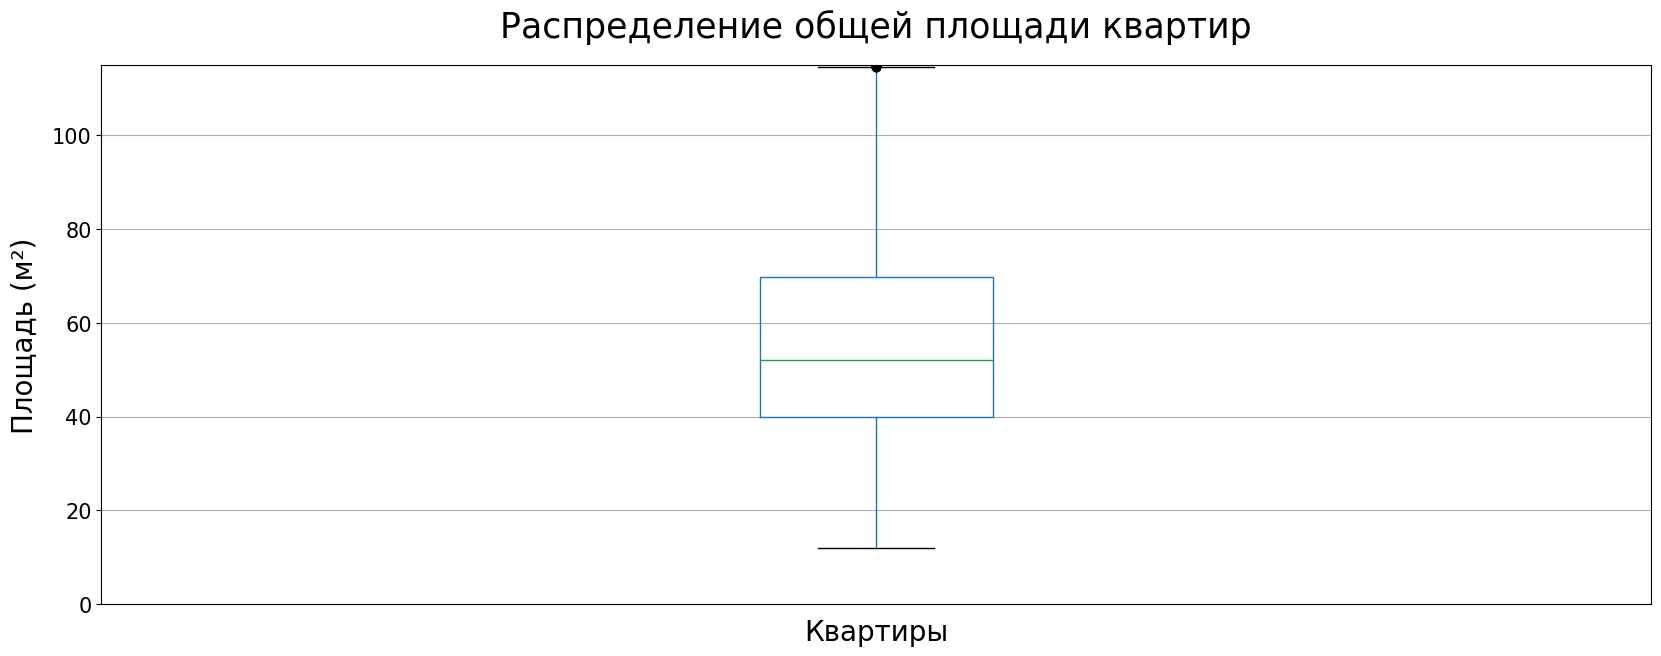

In [130]:
# ищем аномалии
data.boxplot(column='total_area', figsize=(20, 7))
plt.ylim(0, 115)

plt.grid(True)
plt.xlabel('Квартиры', labelpad=10, fontsize=20)
plt.ylabel('Площадь (м²)', labelpad=10, fontsize=20)
plt.xticks([])
plt.yticks(fontsize=15)
plt.title('Распределение общей площади квартир', pad=20, fontsize=25);

In [131]:
# процент данных с анамальным значением 
len(data[data['total_area'] > 200]) / len(data) * 100

0.9570999025960276

In [132]:
data = data[data['total_area'] < 200]

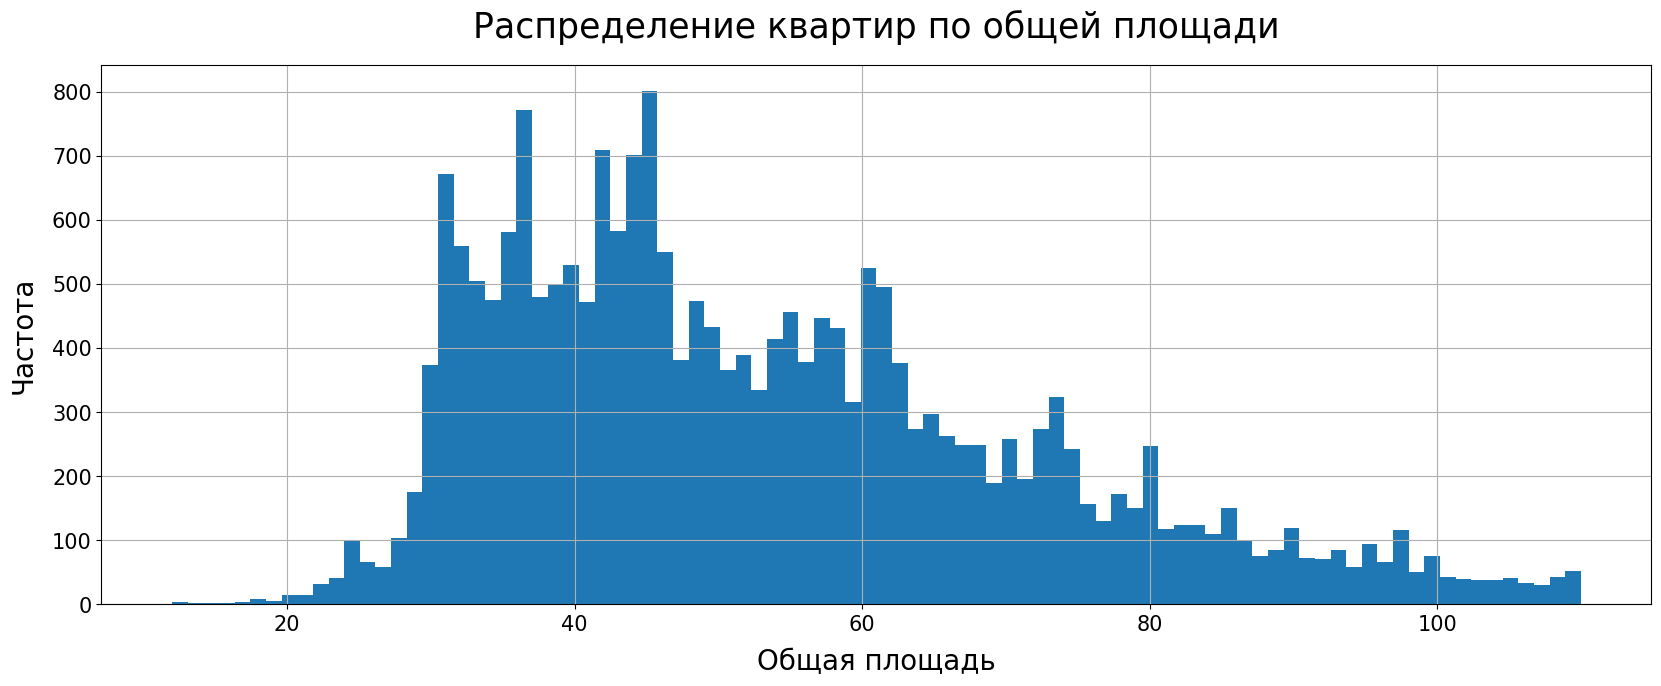

In [186]:
# смотрим на распределение с учетом аномальных значений
data.query('10 <= total_area <= 110').plot(kind='hist', y='total_area', bins=(90), figsize=(20, 7), grid=True, legend=False)

plt.xlabel('Общая площадь', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение квартир по общей площади', pad=20, fontsize=25);

Наблюдаются пиковые значения для квартир площадью 30 м², 40-45 м² и 60 м² — именно такие квартиры чаще всего выставляют на продажу. По мере увеличения площади число предложений на рынке уменьшается.

#### Анализ жилой площади

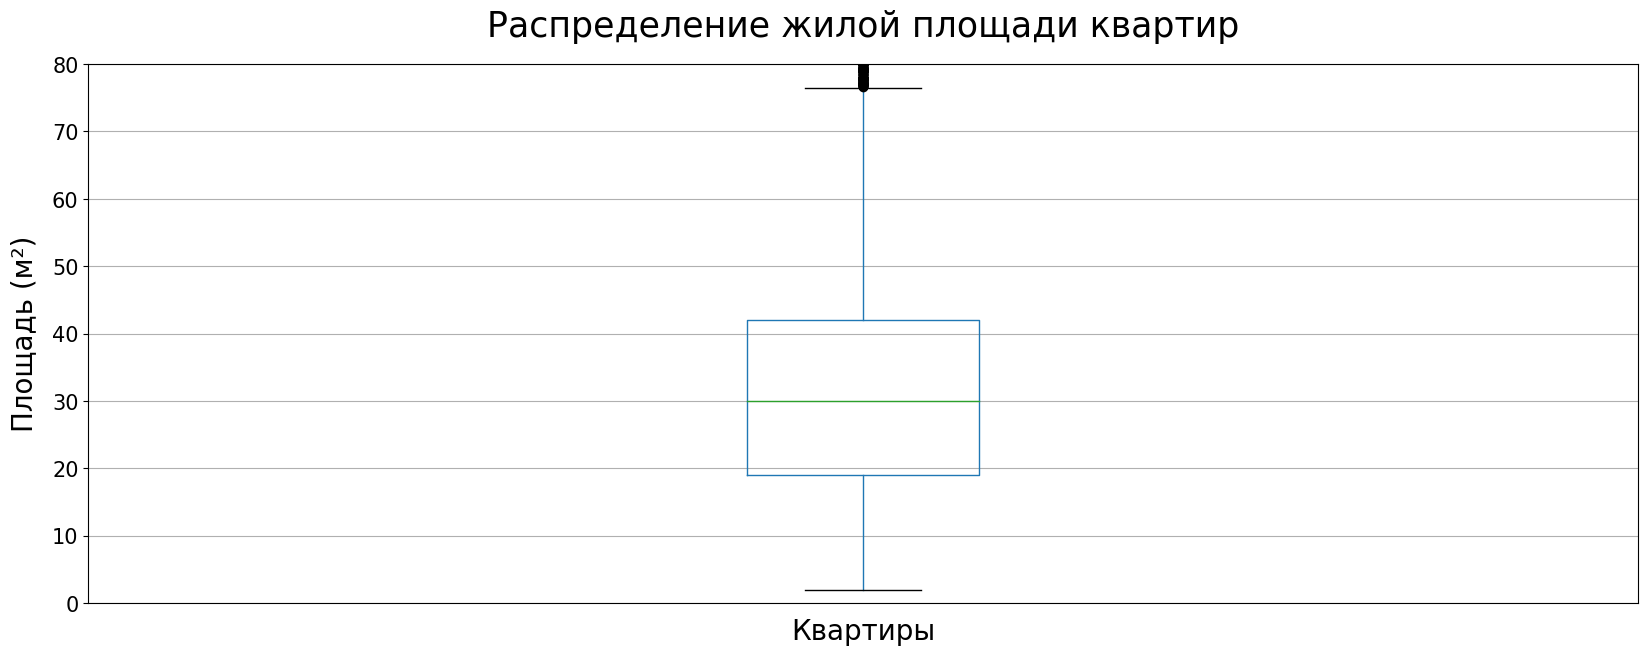

In [134]:
# ищем аномалии
data.boxplot(column='living_area', figsize=(20, 7))
plt.ylim(0, 80)

plt.grid(True)
plt.xlabel('Квартиры', labelpad=10, fontsize=20)
plt.ylabel('Площадь (м²)', labelpad=10, fontsize=20)
plt.xticks([])
plt.yticks(fontsize=15)
plt.title('Распределение жилой площади квартир', pad=20, fontsize=25);

In [135]:
# процент данных с анамальным значением 
len(data[data['living_area'] > 80]) / len(data) * 100

2.3093700551682845

In [136]:
data = data[data['living_area'] < 80]

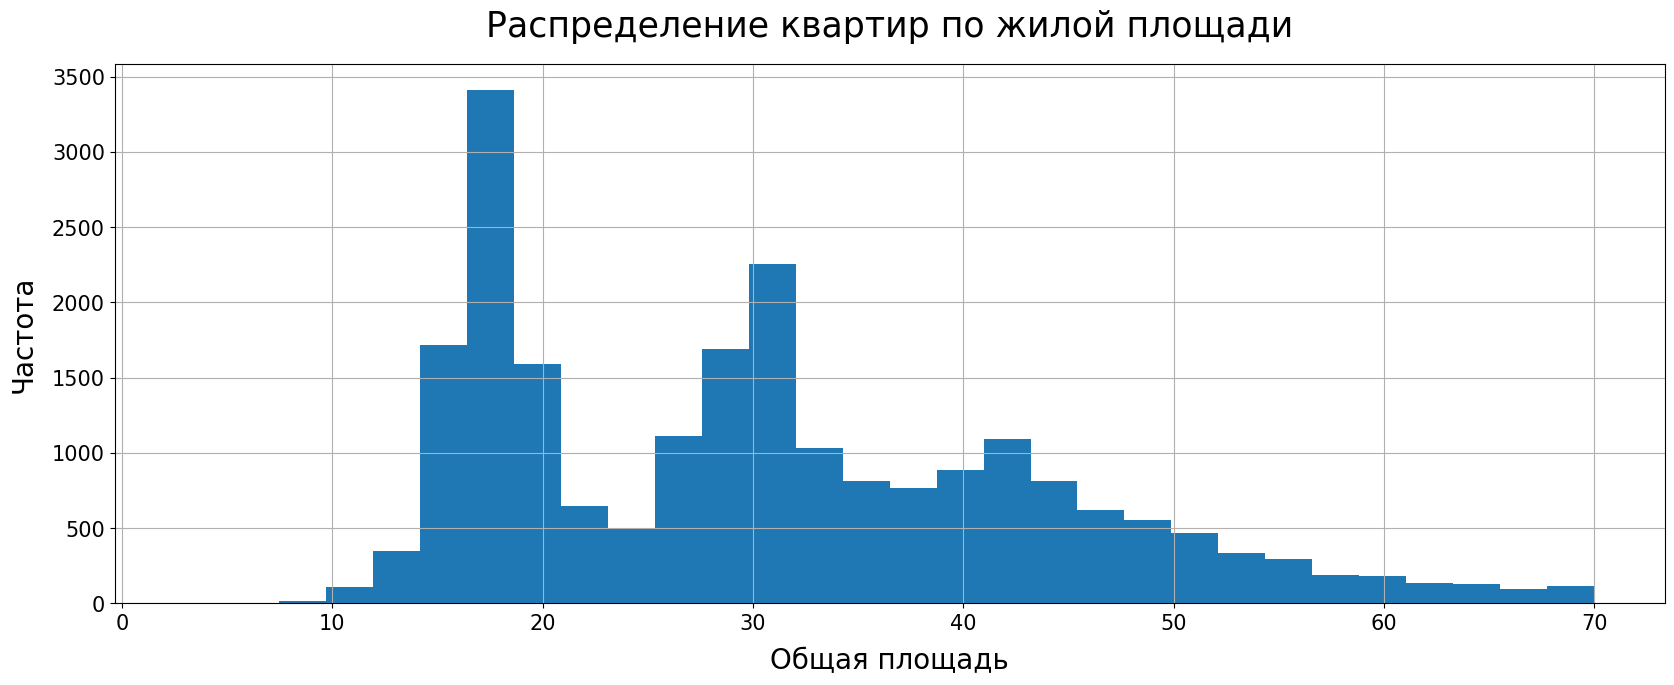

In [193]:
# смотрим на распределение с учетом аномальных значений
data.query('3 <= living_area <= 70')['living_area'].hist(bins=(30), figsize=(20, 7), legend=False)

plt.xlabel('Общая площадь', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение квартир по жилой площади', pad=20, fontsize=25);

На рынке преобладают квартиры с жилой площадью 15-18 квадратных метров. Далее наблюдается меньший пик для 30-метровых апартаментов, а затем — ещё один всплеск для квартир площадью 42 квадратных метра. После этого количество предложений плавно сокращается.

#### Анализ площади кухни

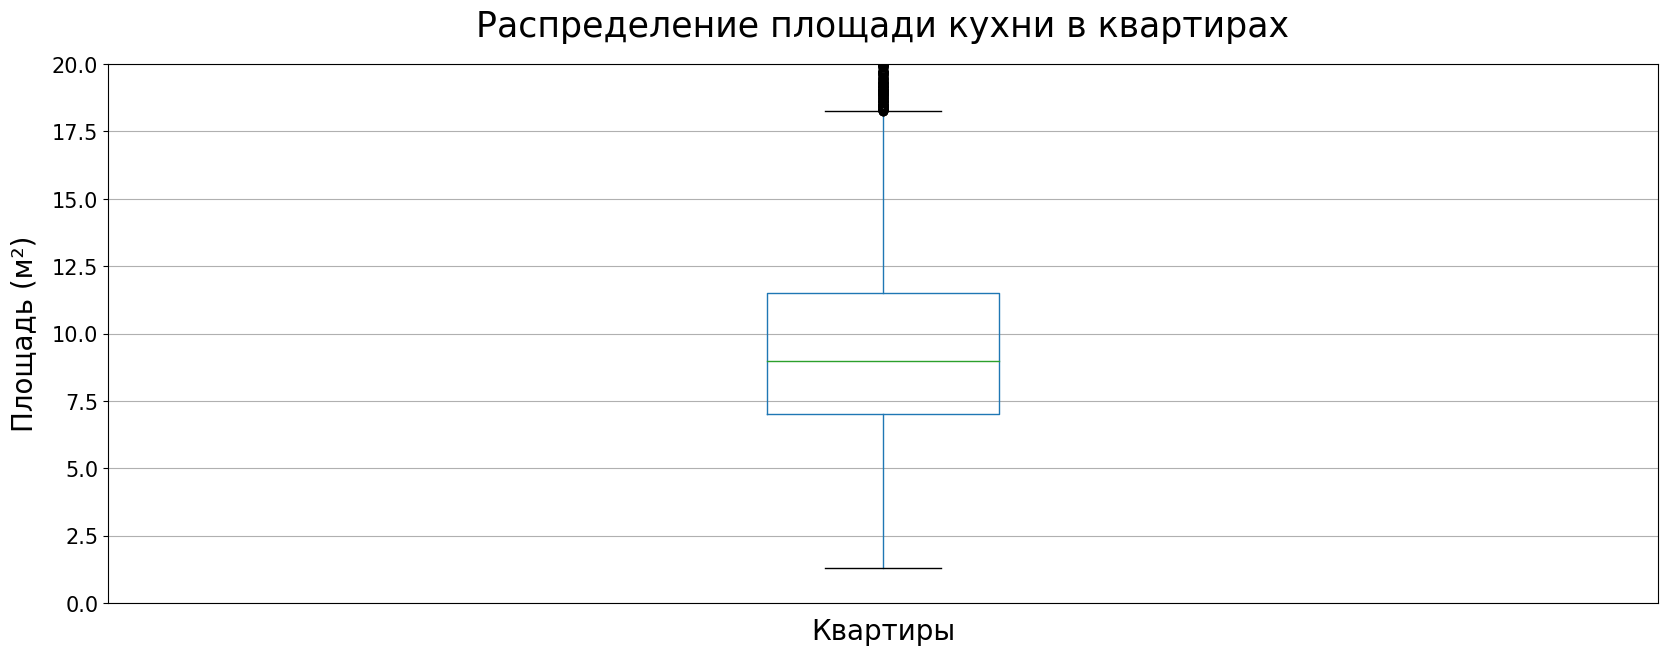

In [138]:
# ищем аномалии
data.boxplot(column='kitchen_area', figsize=(20, 7))
plt.ylim(0, 20)

plt.grid(True)
plt.xlabel('Квартиры', labelpad=10, fontsize=20)
plt.ylabel('Площадь (м²)', labelpad=10, fontsize=20)
plt.xticks([])
plt.yticks(fontsize=15)
plt.title('Распределение площади кухни в квартирах', pad=20, fontsize=25);

In [139]:
# процент данных с анамальным значением 
len(data[data['kitchen_area'] > 25]) / len(data) * 100

1.6788673124972602

In [140]:
data = data[data['kitchen_area'] < 25]

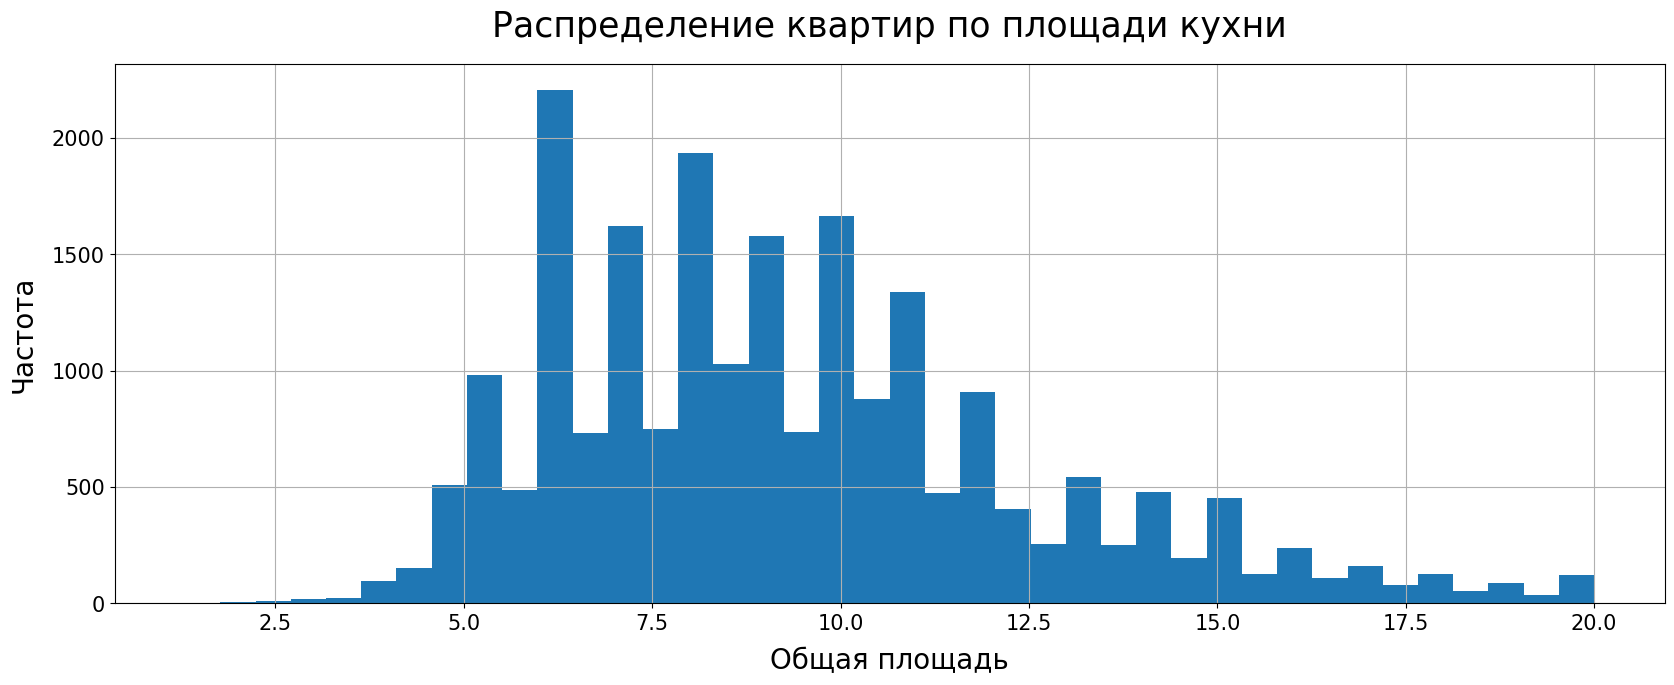

In [194]:
# смотрим на распределение с учетом аномальных значений
data.query('1 <= kitchen_area <= 20')['kitchen_area'].hist(bins=(40), figsize=(20, 7), legend=False)

plt.xlabel('Общая площадь', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение квартир по площади кухни', pad=20, fontsize=25);

В целом наблюдается пирамида распределения: большинство предложений имеют площадь кухни от 5 до 12 метров, с особенно выраженными пиками на 5, 8 и 9 квадратных метрах.

#### Анализ цены объекта

In [142]:
# в единицах значени получаются слишком большими, создадим дополнительный столбцец для визуализации
data['last_price_mln'] = data['last_price'] / 1000000

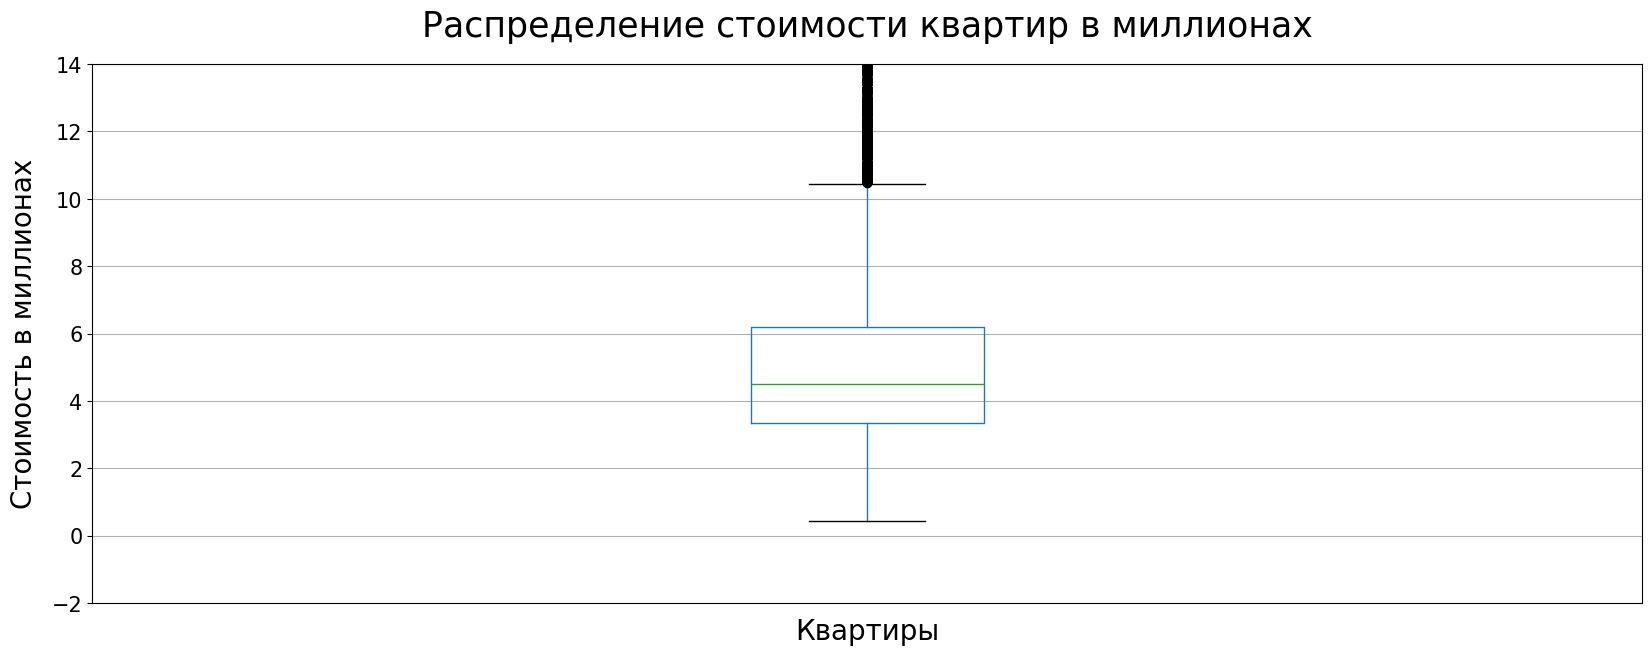

In [195]:
# ищем аномалии
data.boxplot(column='last_price_mln', figsize=(20, 7))
plt.ylim(-2, 14)

plt.grid(True)
plt.xlabel('Квартиры', labelpad=10, fontsize=20)
plt.ylabel('Стоимость в миллионах', labelpad=10, fontsize=20)
plt.xticks([])
plt.yticks(fontsize=15)
plt.title('Распределение стоимости квартир в миллионах', pad=20, fontsize=25);

In [144]:
# процент данных с анамальным значением 
len(data[data['last_price_mln'] > 20]) / len(data) * 100

0.8847580320836499

In [145]:
data = data[data['last_price_mln'] < 20]

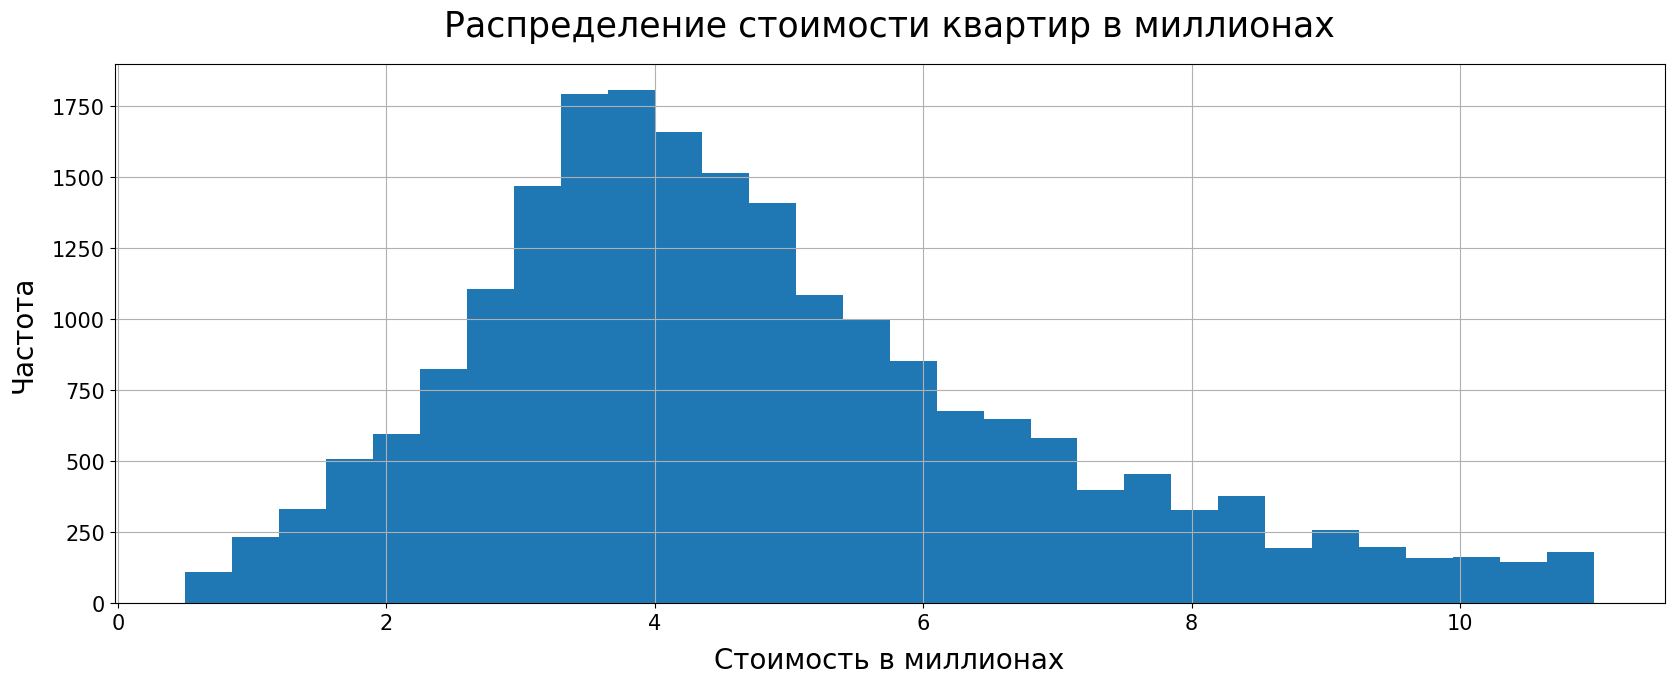

In [196]:
# смотрим на распределение с учетом аномальных значений
data.query('0.5 <= last_price_mln <= 11')['last_price_mln'].hist(bins=(30),  figsize=(20, 7), legend=False)

plt.xlabel('Стоимость в миллионах', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение стоимости квартир в миллионах', pad=20, fontsize=25);

По графику видно, что наиболее часто продавцы оценивают свои квартиры в диапазоне 3-5 миллионов рублей. После 6 миллионов число предложений постепенно уменьшается.

#### Анализ количества комнат

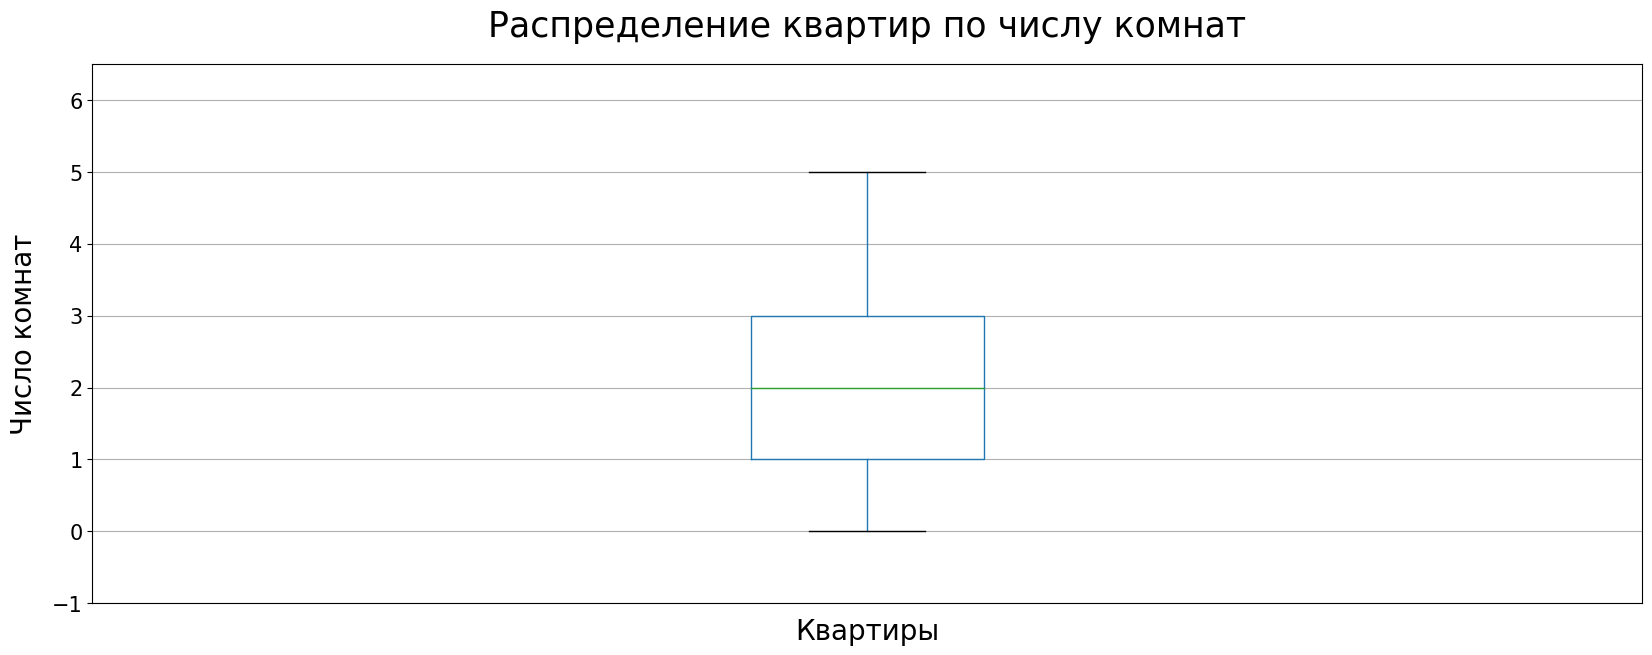

In [198]:
# ищем аномалии
data.boxplot(column='rooms', figsize=(20, 7))
plt.ylim(-1, 6.5)

plt.grid(True)
plt.xlabel('Квартиры', labelpad=10, fontsize=20)
plt.ylabel('Число комнат', labelpad=10, fontsize=20)
plt.xticks([])
plt.yticks(fontsize=15)
plt.title('Распределение квартир по числу комнат', pad=20, fontsize=25);

In [148]:
# процент данных с анамальным значением 
len(data[data['rooms'] > 6]) / len(data) * 100

0.009020386072523904

In [149]:
data = data[data['rooms'] < 6]

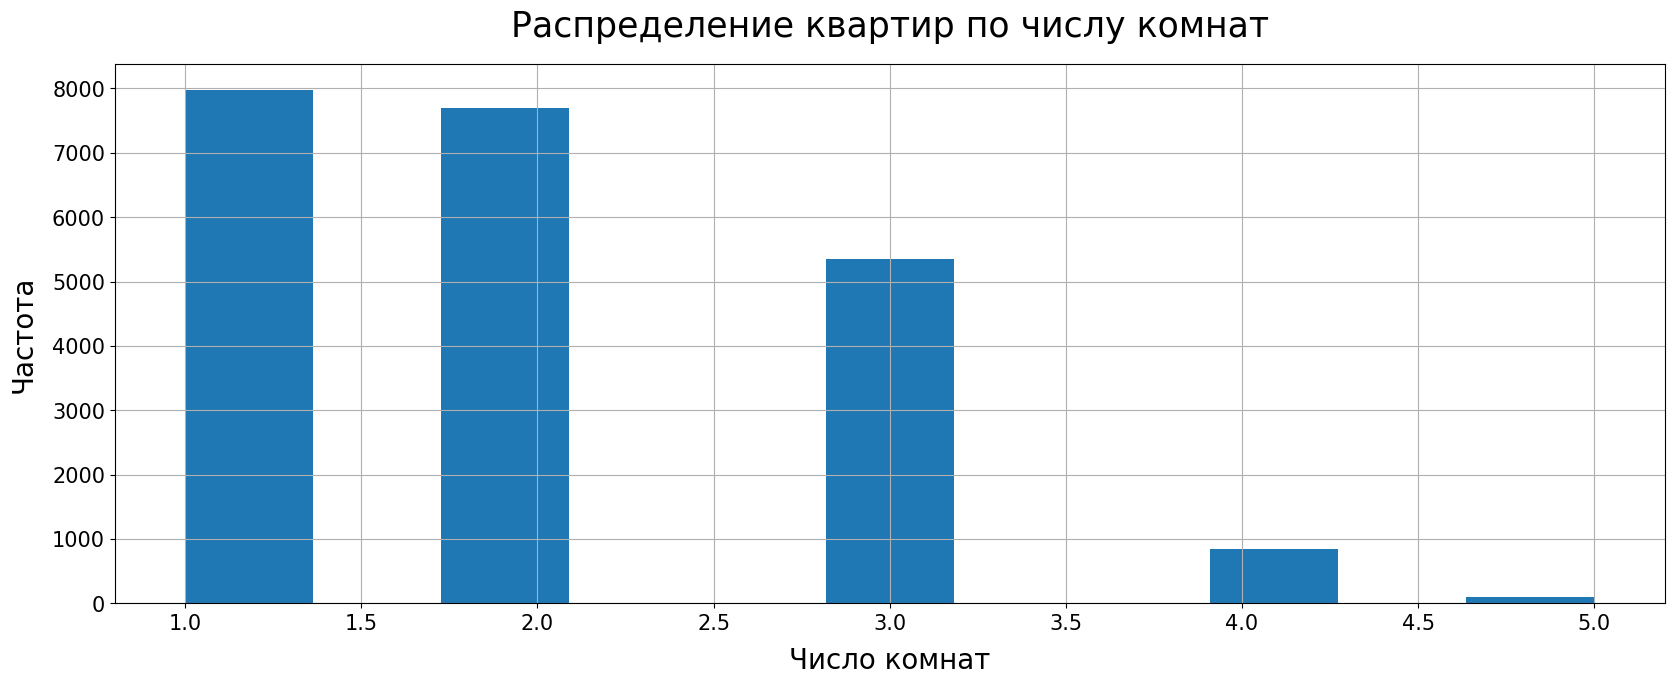

In [199]:
# смотрим на распределение с учетом аномальных значений
data.query('1 <= rooms <= 6')['rooms'].hist(bins=(11), figsize=(20, 7), legend=False)

plt.xlabel('Число комнат', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение квартир по числу комнат', pad=20, fontsize=25);

На продажу в основном выставляют квартиры с 1-2 комнатами. Чуть реже встречаются трехкомнатные квартиры, а квартиры с числом комнат больше 4 появляются на рынке крайне редко.

#### Анализ высоты потолков

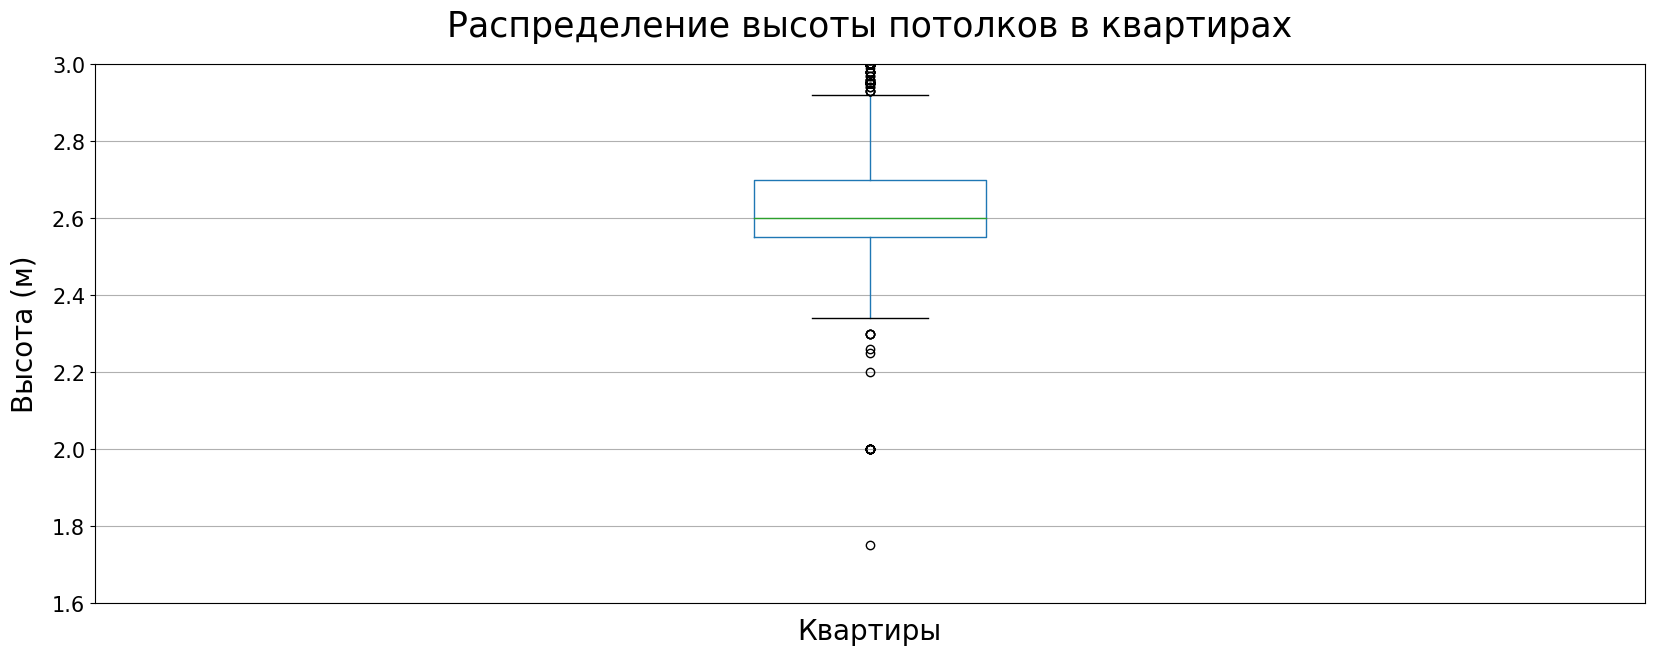

In [204]:
# ищем аномалии
data.boxplot(column='ceiling_height', figsize=(20, 7))
plt.ylim(1.6, 3)

plt.grid(True)
plt.xlabel('Квартиры', labelpad=10, fontsize=20)
plt.ylabel('Высота (м)', labelpad=10, fontsize=20)
plt.xticks([])
plt.yticks(fontsize=15)
plt.title('Распределение высоты потолков в квартирах', pad=20, fontsize=25);

In [152]:
# признаем высоты больше 18 метров ошибкой при внесении (выгрузке) и приводим их к реальному виду
data.loc[data['ceiling_height'] > 18, 'ceiling_height'] = data.loc[data['ceiling_height'] > 18]['ceiling_height'] / 10

In [153]:
# процент данных с анамальным значением 
len(data[data['ceiling_height'] > 5]) / len(data) * 100

0.040608220908721744

In [154]:
data = data[data['ceiling_height'] < 5]

In [155]:
# процент данных с анамальным значением 
len(data[data['ceiling_height'] < 1.5]) / len(data) * 100

0.009028122601904933

In [156]:
data = data[data['ceiling_height'] > 1.5]

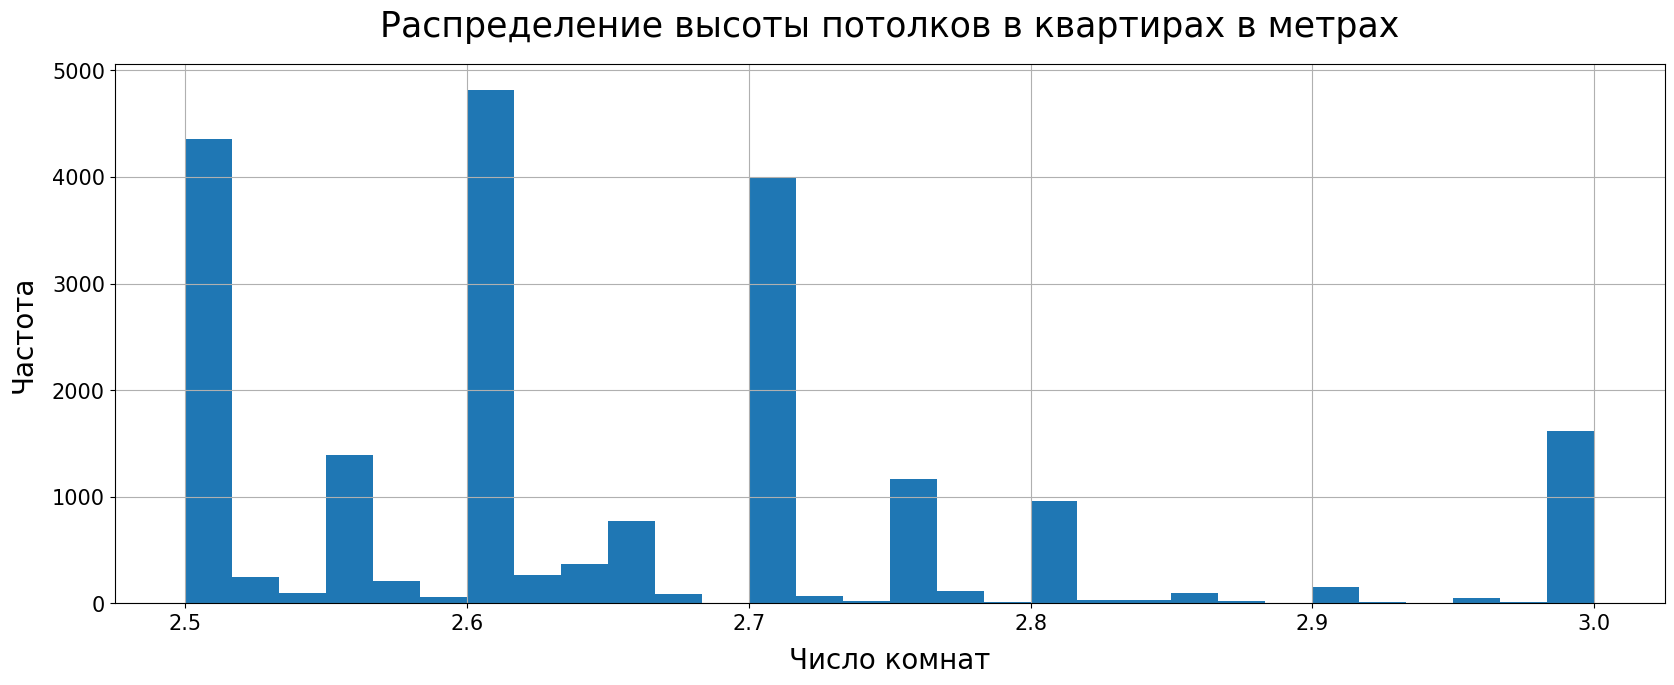

In [205]:
# смотрим на распределение с учетом аномальных значений
data.query('2.5 <= ceiling_height <= 3')['ceiling_height'].hist(bins=(30), figsize=(20, 7), legend=False)

plt.xlabel('Число комнат', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение высоты потолков в квартирах в метрах', pad=20, fontsize=25);

График показывает, что большинство квартир имеют несколько типичных значений высоты потолка, которые выделяются пиками. Наиболее частые значения — 2,5 м, 2,6 м, 2,7 м и 3 м, которые демонстрируют наибольшую массовость.

#### Анализ этажа квартиры

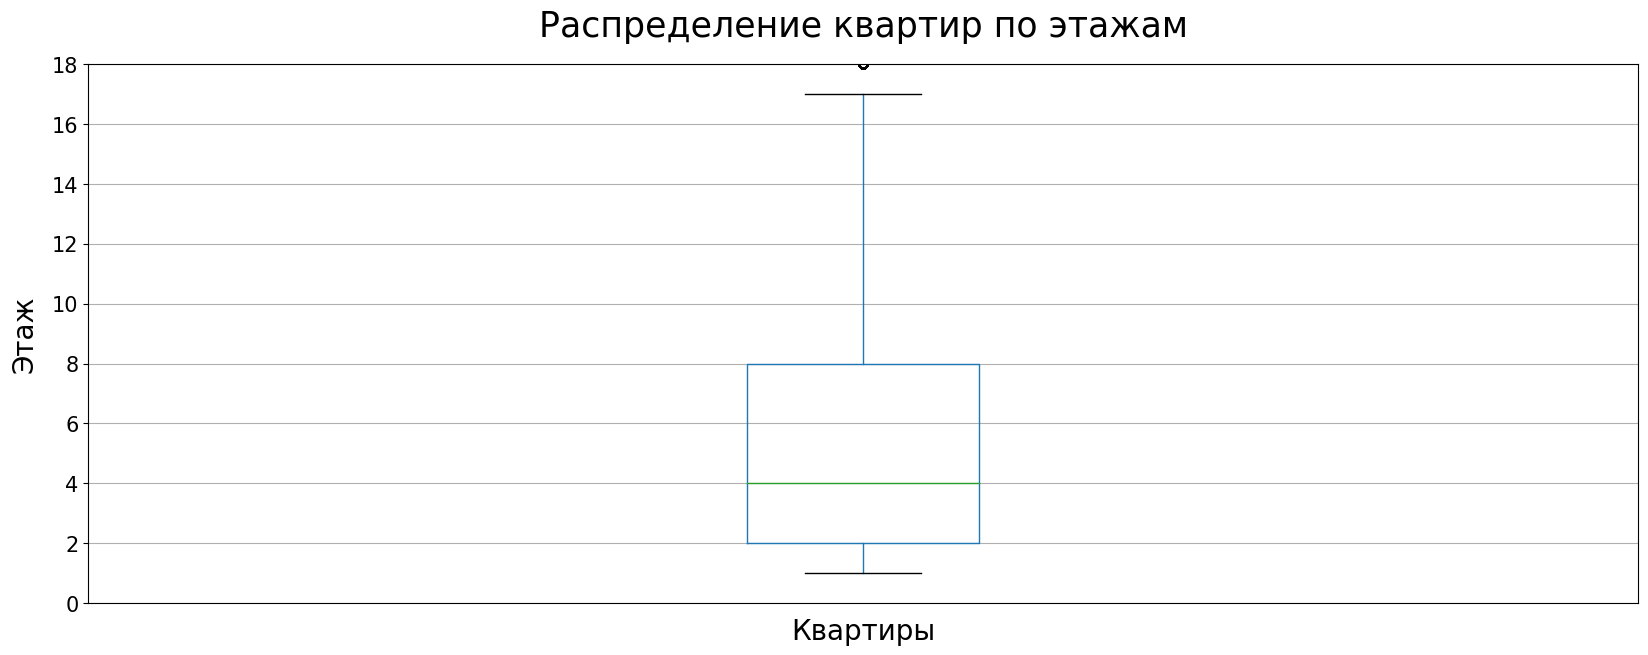

In [207]:
# ищем аномалии
data.boxplot(column='floor', figsize=(20, 7))
plt.ylim(0, 18)

plt.grid(True)
plt.xlabel('Квартиры', labelpad=10, fontsize=20)
plt.ylabel('Этаж', labelpad=10, fontsize=20)
plt.xticks([])
plt.yticks(fontsize=15)
plt.title('Распределение квартир по этажам', pad=20, fontsize=25);

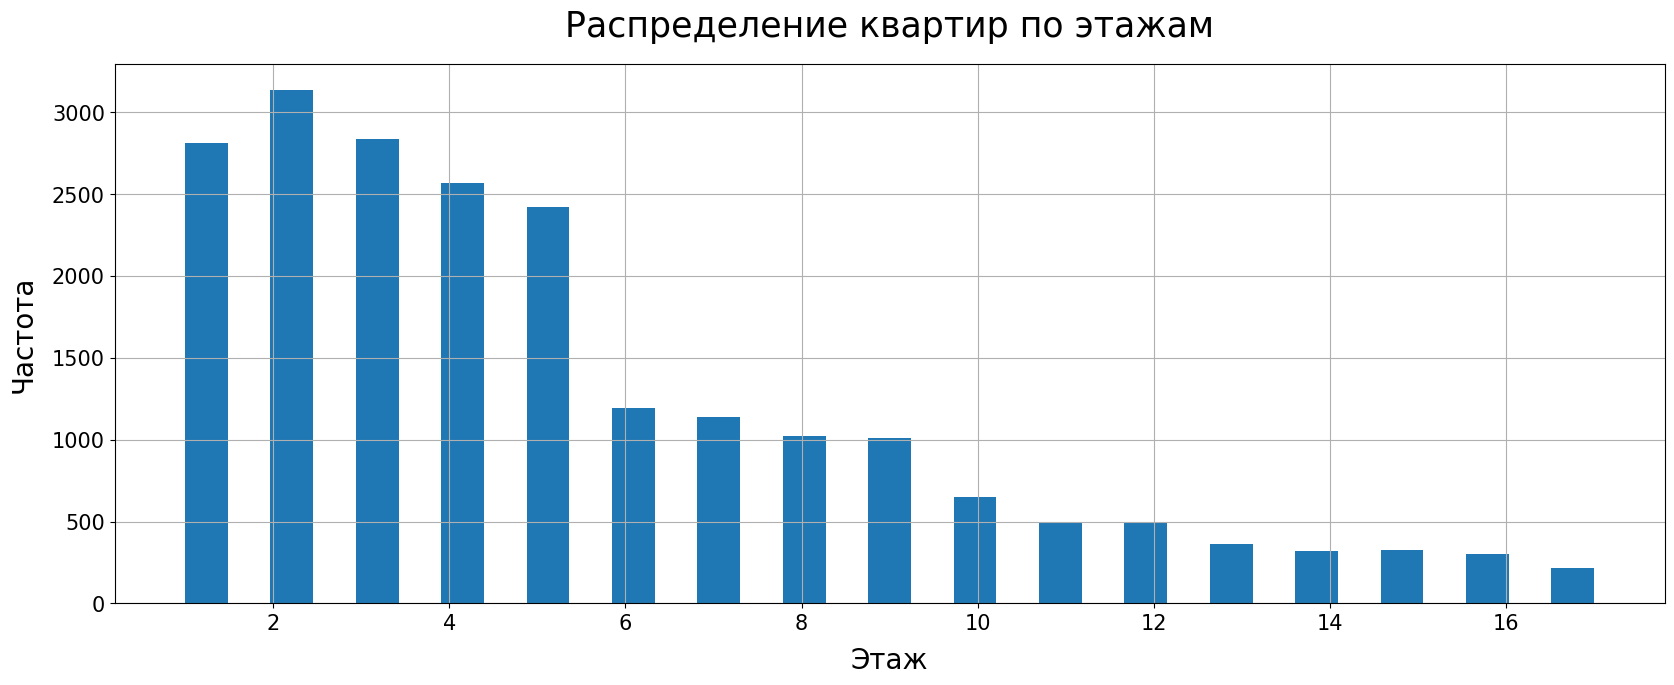

In [208]:
# смотрим на распределение с учетом аномальных значений
data.query('1 <= floor <= 17')['floor'].hist(bins=(33), figsize=(20, 7), legend=False)

plt.xlabel('Этаж', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение квартир по этажам', pad=20, fontsize=25);

Чаще всего продают квартиры на 1-5 этажах, причем наиболее часто — на 2 этаже. В два раза реже квартиры находятся на 6-9 этажах, еще реже — на 10-12 этажах, и крайне редко — на остальных этажах.

#### Анализ общего количества этажей в доме

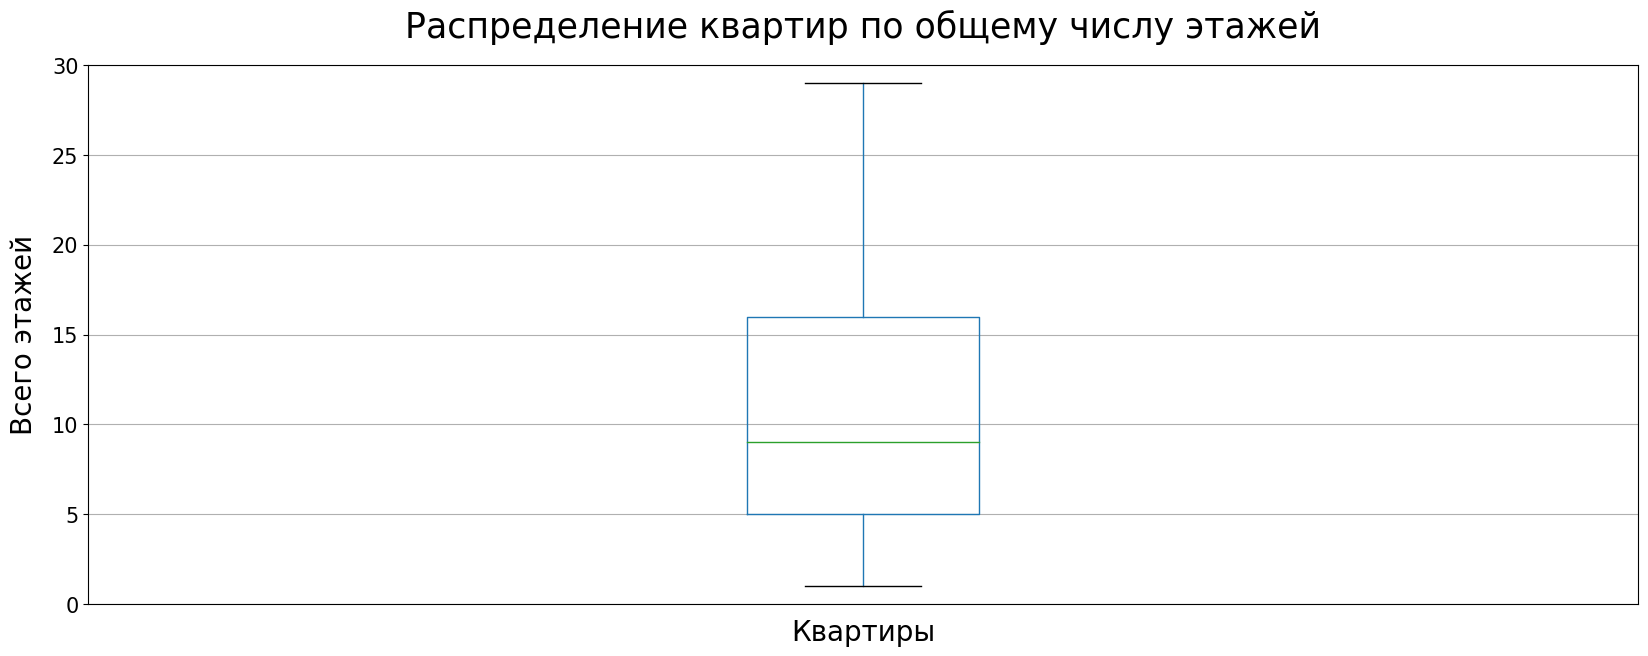

In [210]:
# ищем аномалии
data.boxplot(column='floors_total', figsize=(20, 7))
plt.ylim(0, 30)

plt.grid(True)
plt.xlabel('Квартиры', labelpad=10, fontsize=20)
plt.ylabel('Всего этажей', labelpad=10, fontsize=20)
plt.xticks([])
plt.yticks(fontsize=15)
plt.title('Распределение квартир по общему числу этажей', pad=20, fontsize=25);

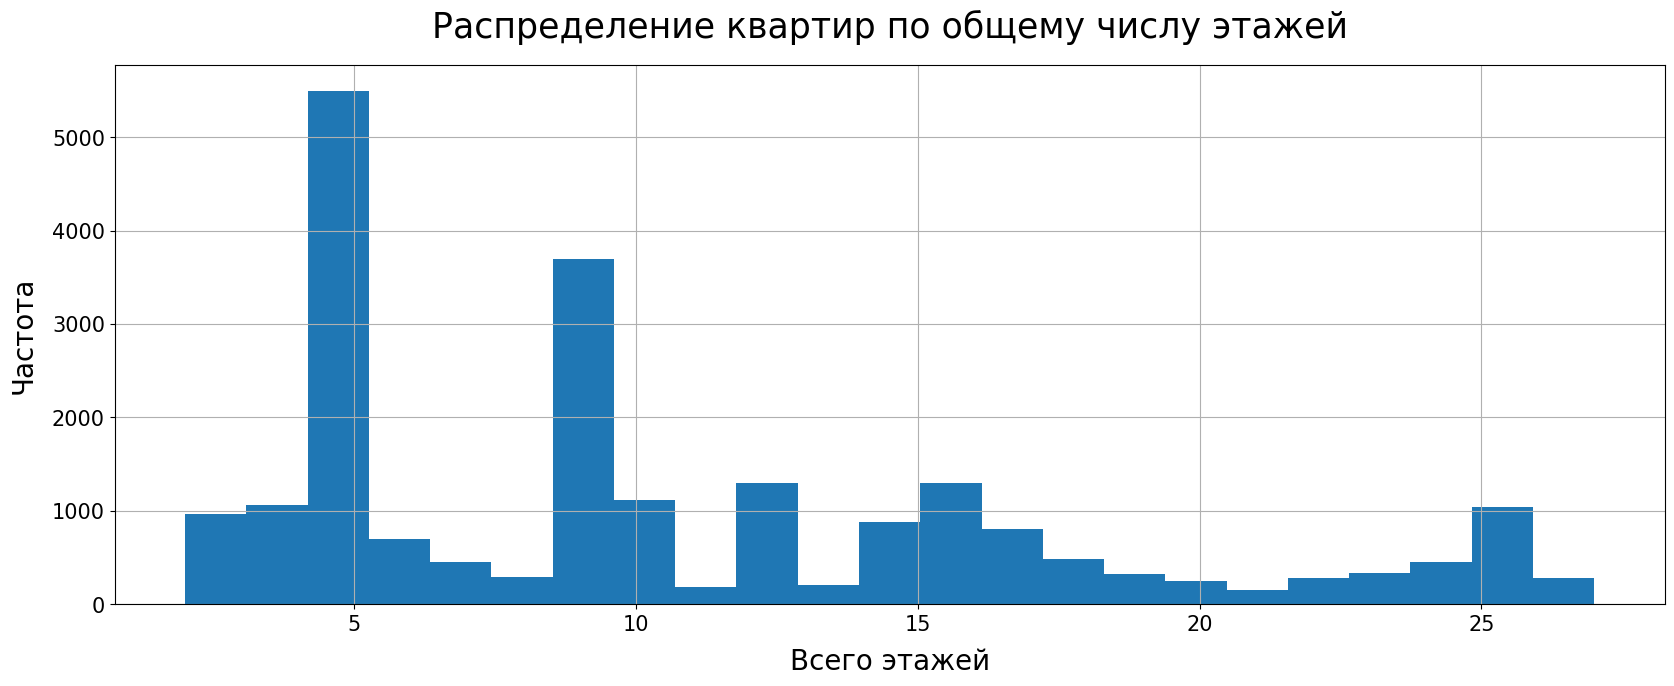

In [211]:
# смотрим на распределение с учетом аномальных значений
data.query('2 <= floors_total <= 27')['floors_total'].hist(bins=(23), figsize=(20, 7), legend=False)

plt.xlabel('Всего этажей', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение квартир по общему числу этажей', pad=20, fontsize=25);

Чаще всего продавцы хотят избавиться от квартир в пятиэтажных домах. На втором месте — девятиэтажные здания, а квартиры в других типах строений продаются значительно реже.

#### Анализ расстояния до центра города 

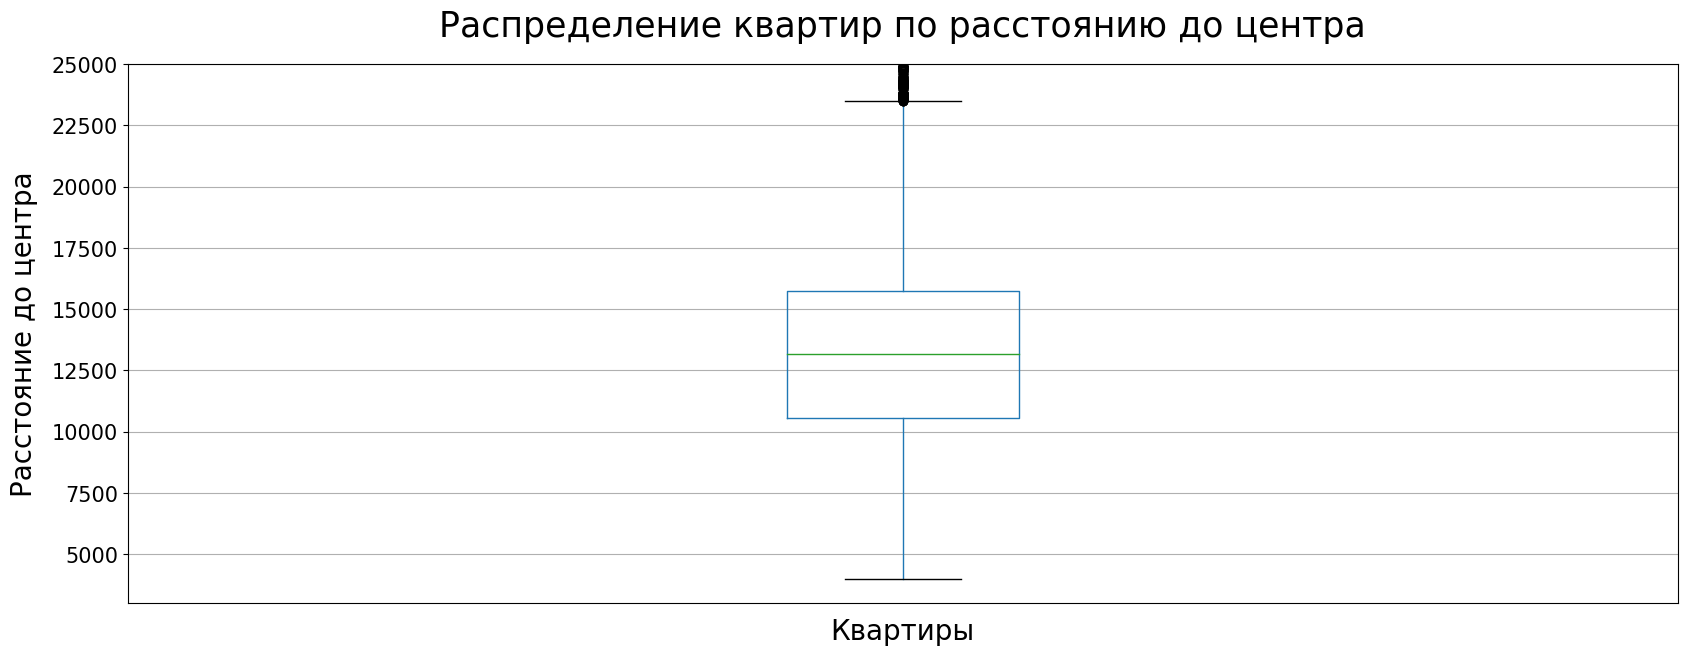

In [213]:
# ищем аномалии
data.query('4000 <= city_centers_nearest <= 28000').boxplot(column='city_centers_nearest', figsize=(20, 7));
plt.ylim(3000, 25000)

plt.grid(True)
plt.xlabel('Квартиры', labelpad=10, fontsize=20)
plt.ylabel('Расстояние до центра (км) ', labelpad=10, fontsize=20)
plt.xticks([])
plt.yticks(fontsize=15)
plt.title('Распределение квартир по расстоянию до центра', pad=20, fontsize=25);

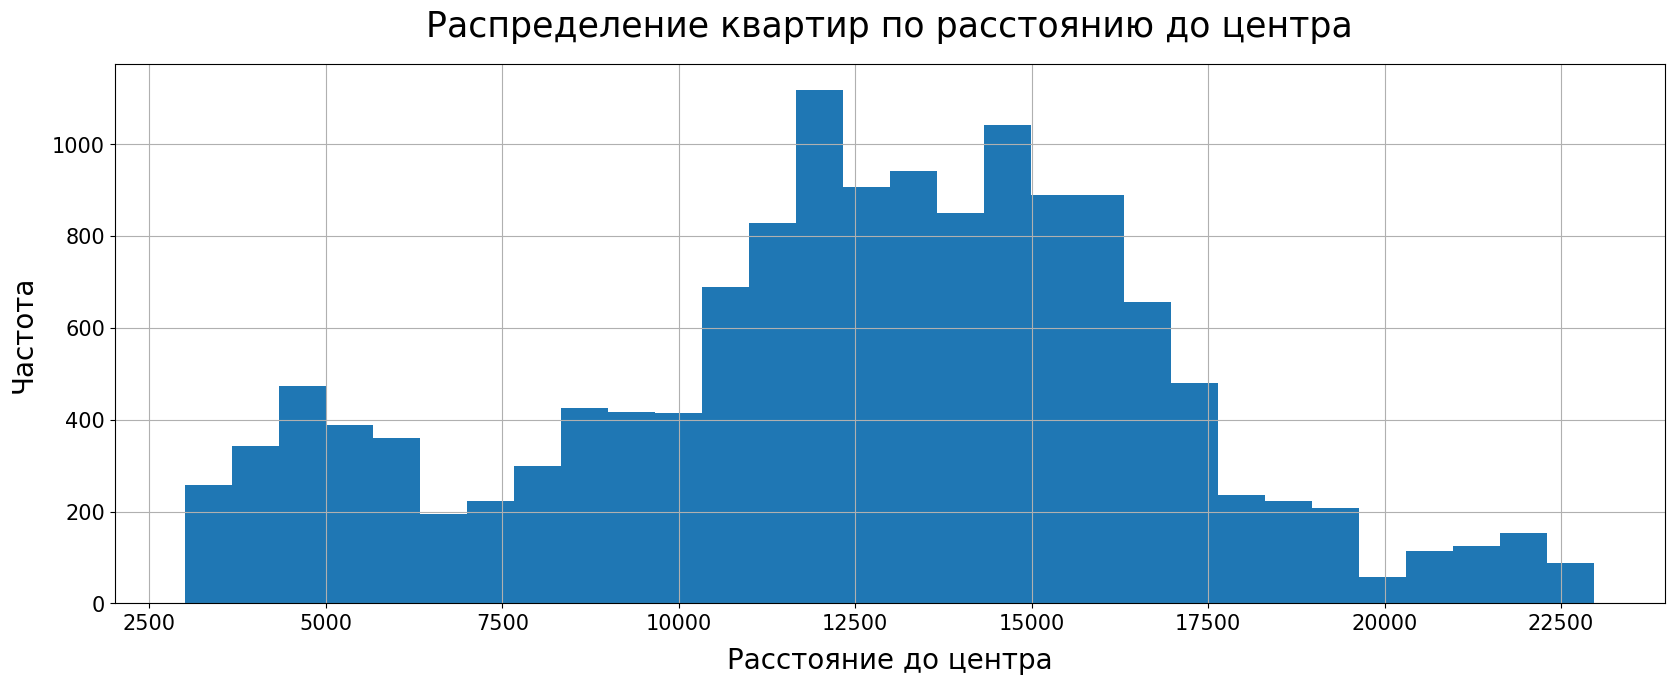

In [214]:
# смотрим на распределение с учетом аномальных значений
data.query('3000 <= city_centers_nearest <= 23000')['city_centers_nearest'].hist(bins=(30), figsize=(20, 7), legend=False)

plt.xlabel('Расстояние до центра (км)', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение квартир по расстоянию до центра', pad=20, fontsize=25);

Большинство квартир находится на расстоянии 10-16 километров от центра города. Также наблюдается значительное количество квартир на расстоянии 22 км, что, вероятно, является медианой для населённых пунктов, использованных для заполнения пропусков. Часто продаются квартиры и совсем близко к центру, в радиусе 5 км, но они всё же уступают по численности квартирам на расстоянии 10-16 км и 22 км.

#### Анализ расстояния ближайшего аэропорта

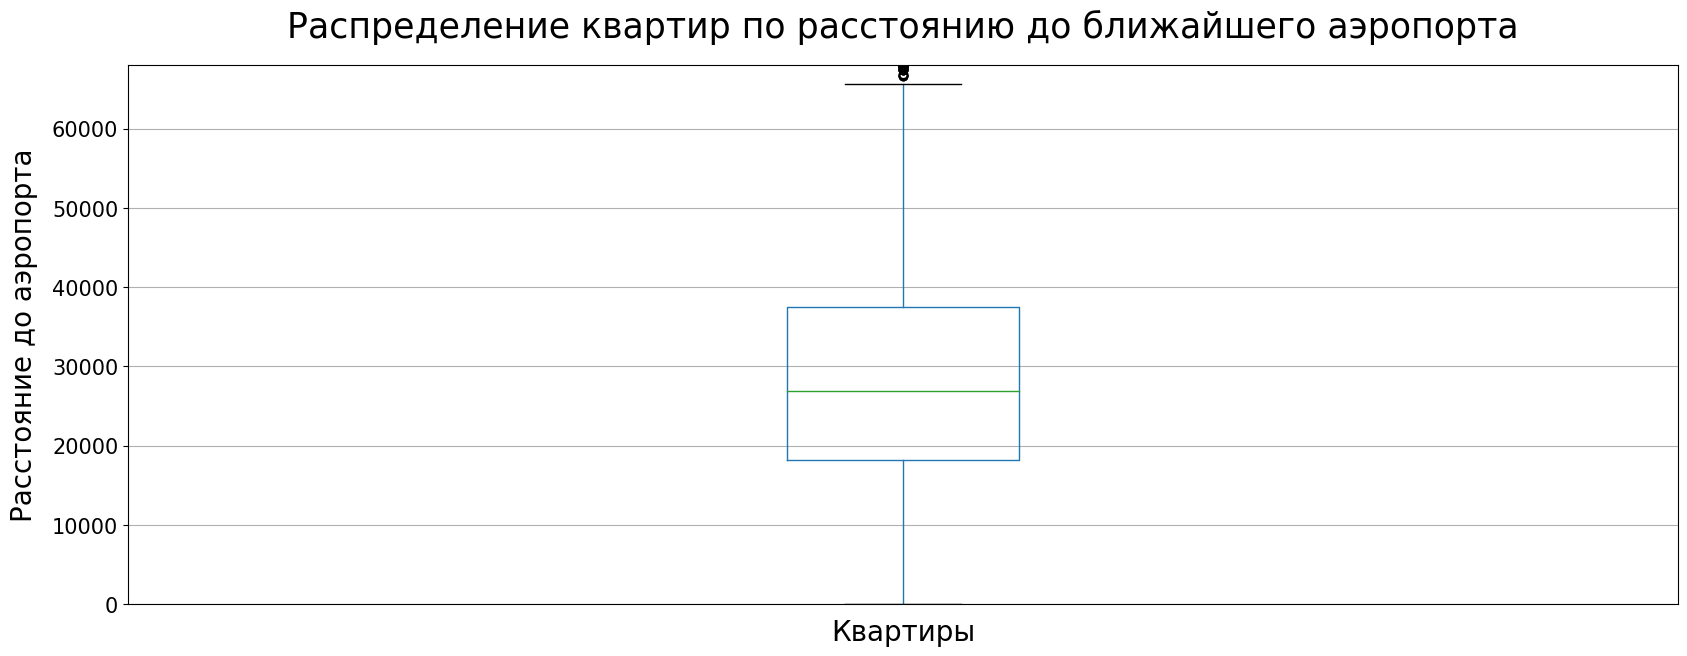

In [218]:
# ищем аномалии
data.boxplot(column='airports_nearest', figsize=(20, 7));
plt.ylim(0, 68000)

plt.grid(True)
plt.xlabel('Квартиры', labelpad=10, fontsize=20)
plt.ylabel('Расстояние до аэропорта (км)', labelpad=10, fontsize=20)
plt.xticks([])
plt.yticks(fontsize=15)
plt.title('Распределение квартир по расстоянию до ближайшего аэропорта', pad=20, fontsize=25);

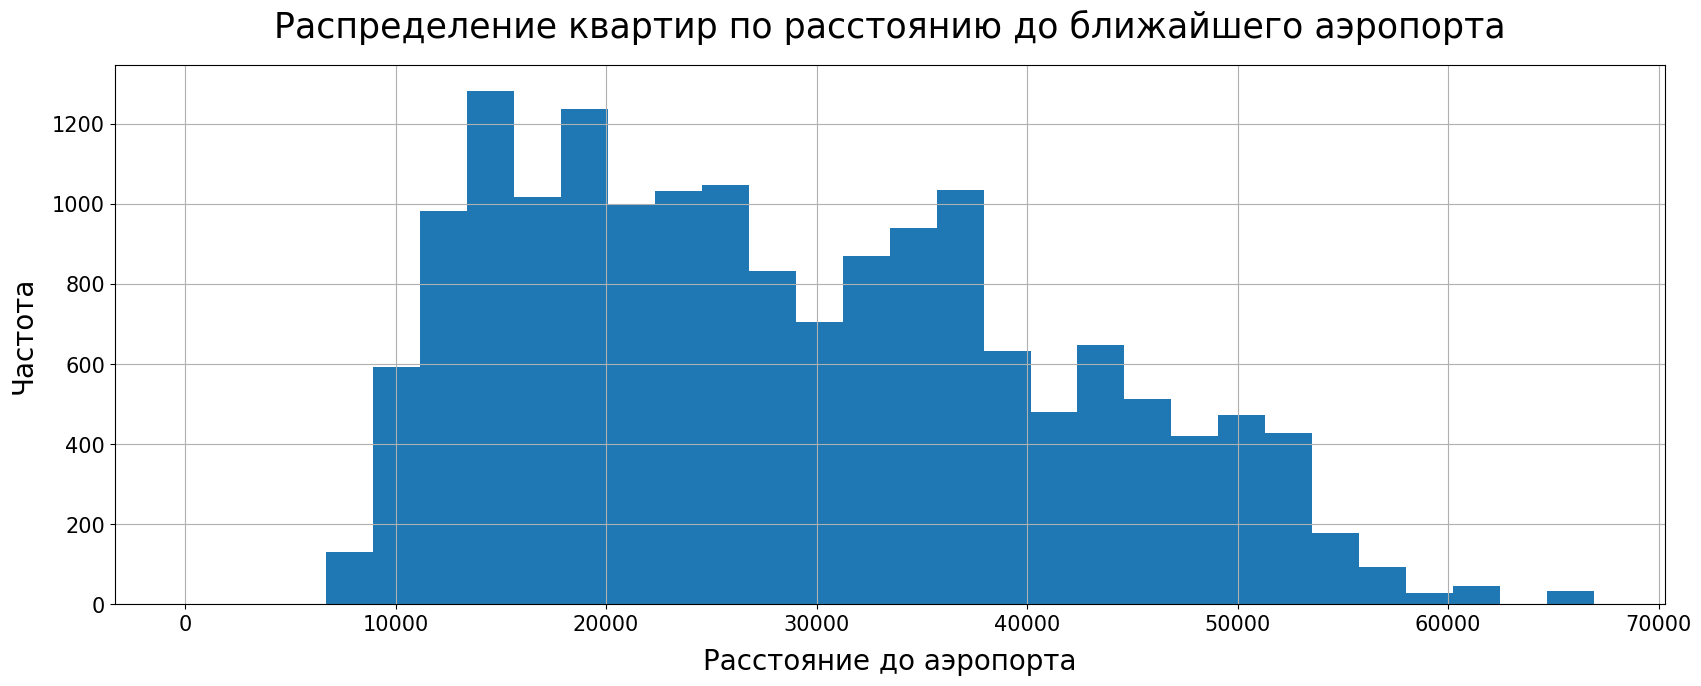

In [219]:
# смотрим на распределение с учетом аномальных значений
data.query('0 <= airports_nearest <= 67000')['airports_nearest'].hist(bins=(30), figsize=(20, 7), legend=False)

plt.xlabel('Расстояние до аэропорта (км)', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение квартир по расстоянию до ближайшего аэропорта', pad=20, fontsize=25);

Квартиры делятся на три основные категории по расстоянию до аэропорта. Наиболее распространены квартиры на расстоянии 11-25 километров. Далее следуют квартиры на расстоянии 30-40 километров, а также наблюдается всплеск на 50-55 километрах, вероятно, из-за заполнения пропусков по медианным значениям расстояний. После 55 километров количество предложений резко сокращается.

#### Анализ расстояния до ближайшего парка

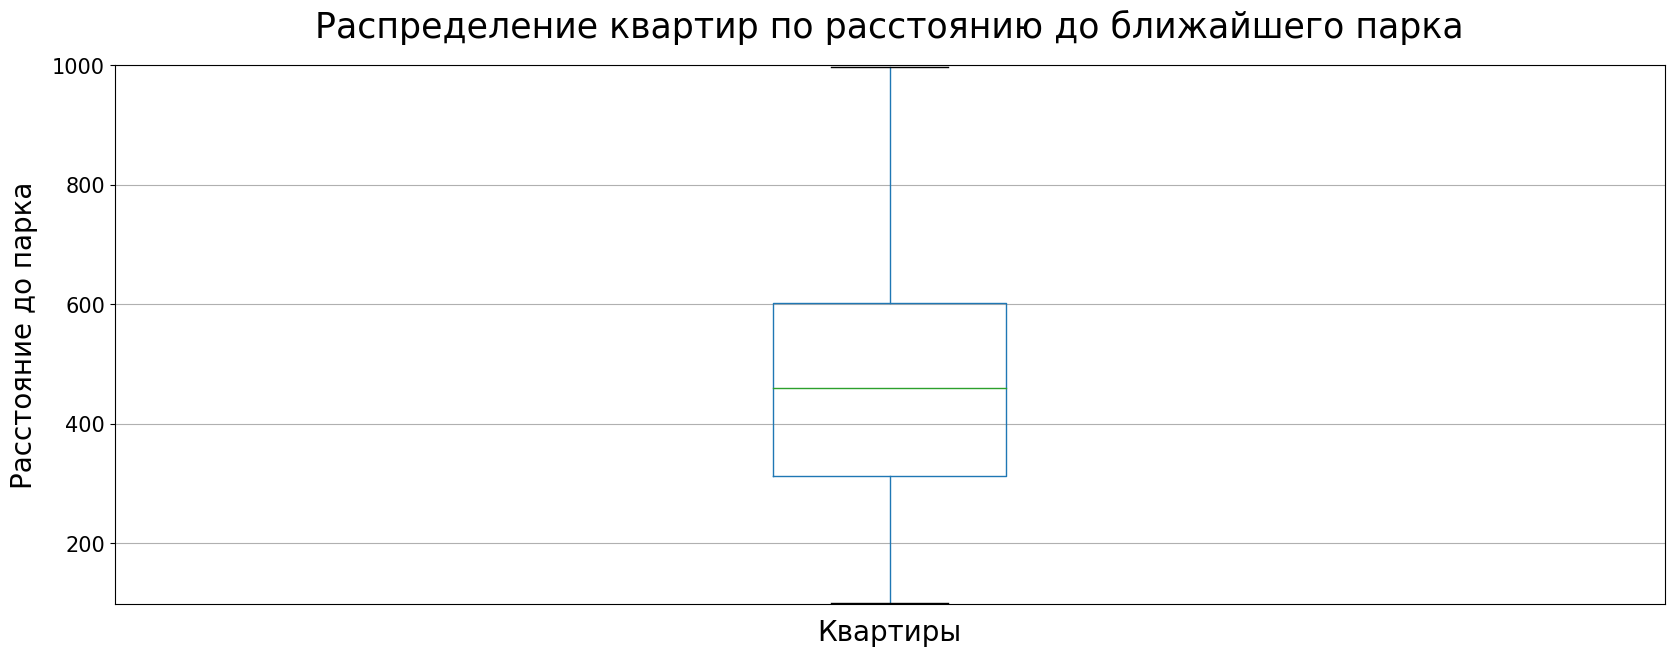

In [222]:
# ищем аномалии
data.query('100 <= parks_nearest <= 1000').boxplot(column='parks_nearest', figsize=(20, 7));
plt.ylim(98, 1000)

plt.grid(True)
plt.xlabel('Квартиры', labelpad=10, fontsize=20)
plt.ylabel('Расстояние до парка 9км)', labelpad=10, fontsize=20)
plt.xticks([])
plt.yticks(fontsize=15)
plt.title('Распределение квартир по расстоянию до ближайшего парка', pad=20, fontsize=25);

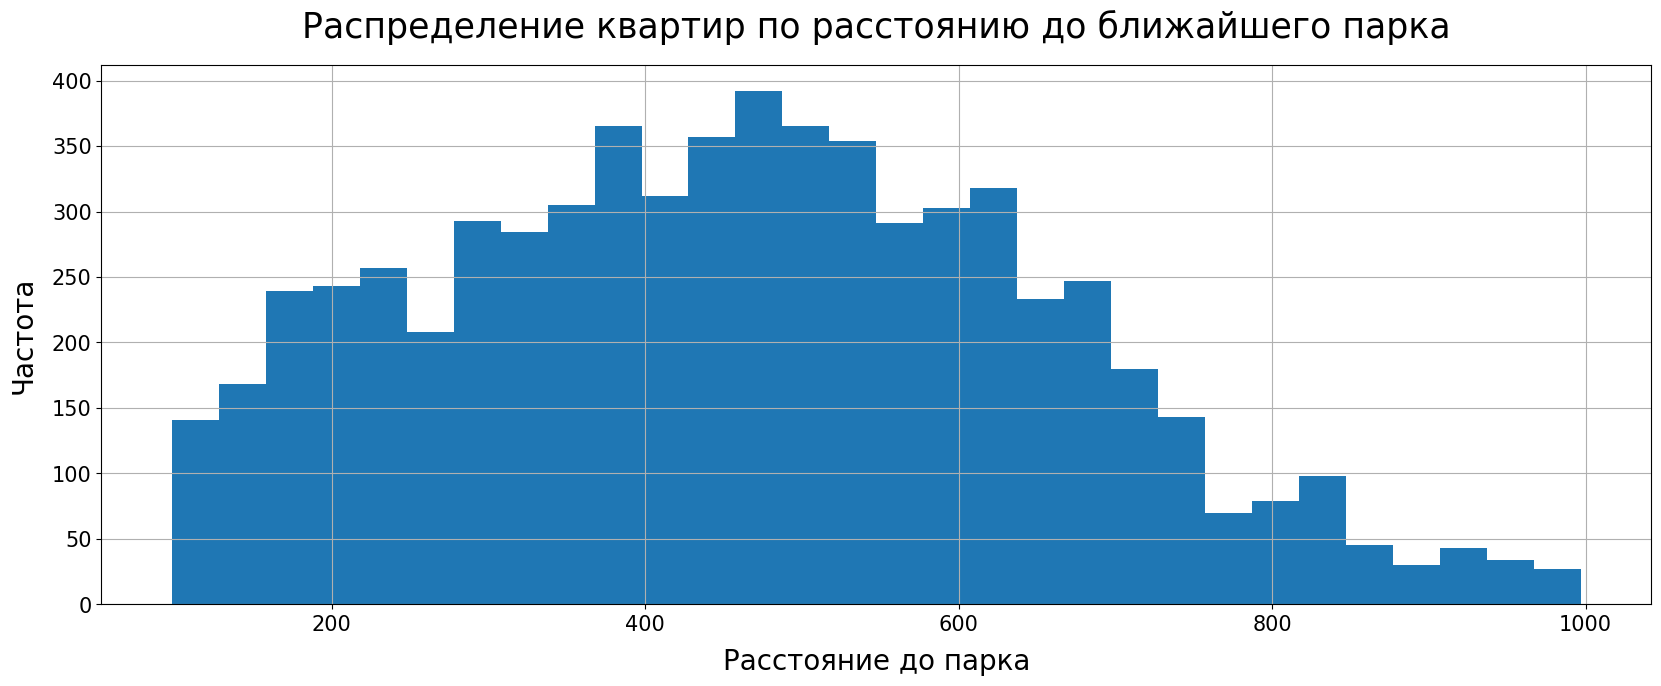

In [223]:
# смотрим на распределение с учетом аномальных значений
data.query('98 <= parks_nearest <= 1000')['parks_nearest'].hist(bins=(30), figsize=(20, 7), legend=False)

plt.xlabel('Расстояние до парка (км)', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение квартир по расстоянию до ближайшего парка', pad=20, fontsize=25);

В подавляющем числе случаев парки находятся на расстоянии не более 350-650 метров от продаваемых квартир.

#### Изучим, как быстро продавались квартиры 

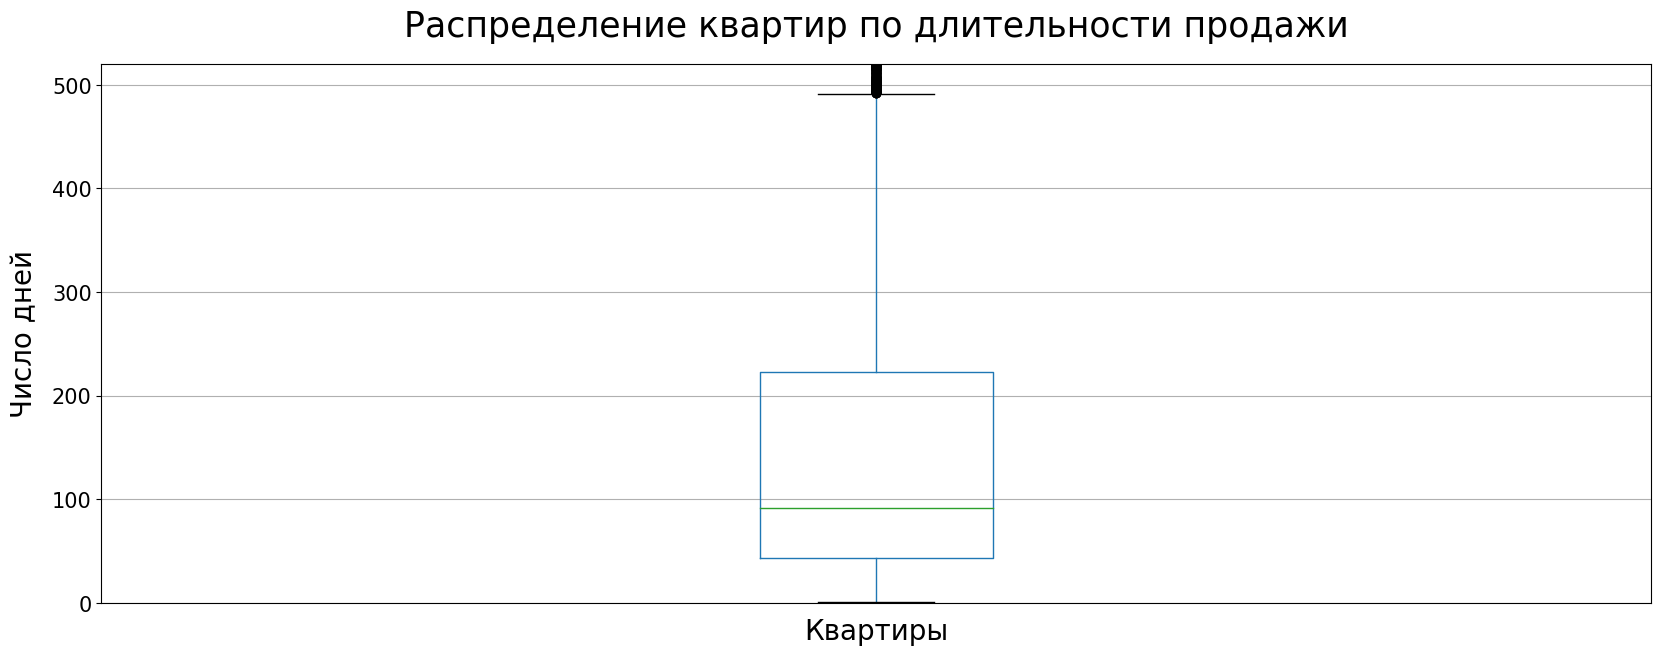

In [225]:
# ищем аномалии
data.boxplot(column='days_exposition', figsize=(20, 7))
plt.ylim(0, 520)

plt.grid(True)
plt.xlabel('Квартиры', labelpad=10, fontsize=20)
plt.ylabel('Число дней', labelpad=10, fontsize=20)
plt.xticks([])
plt.yticks(fontsize=15)
plt.title('Распределение квартир по длительности продажи', pad=20, fontsize=25);

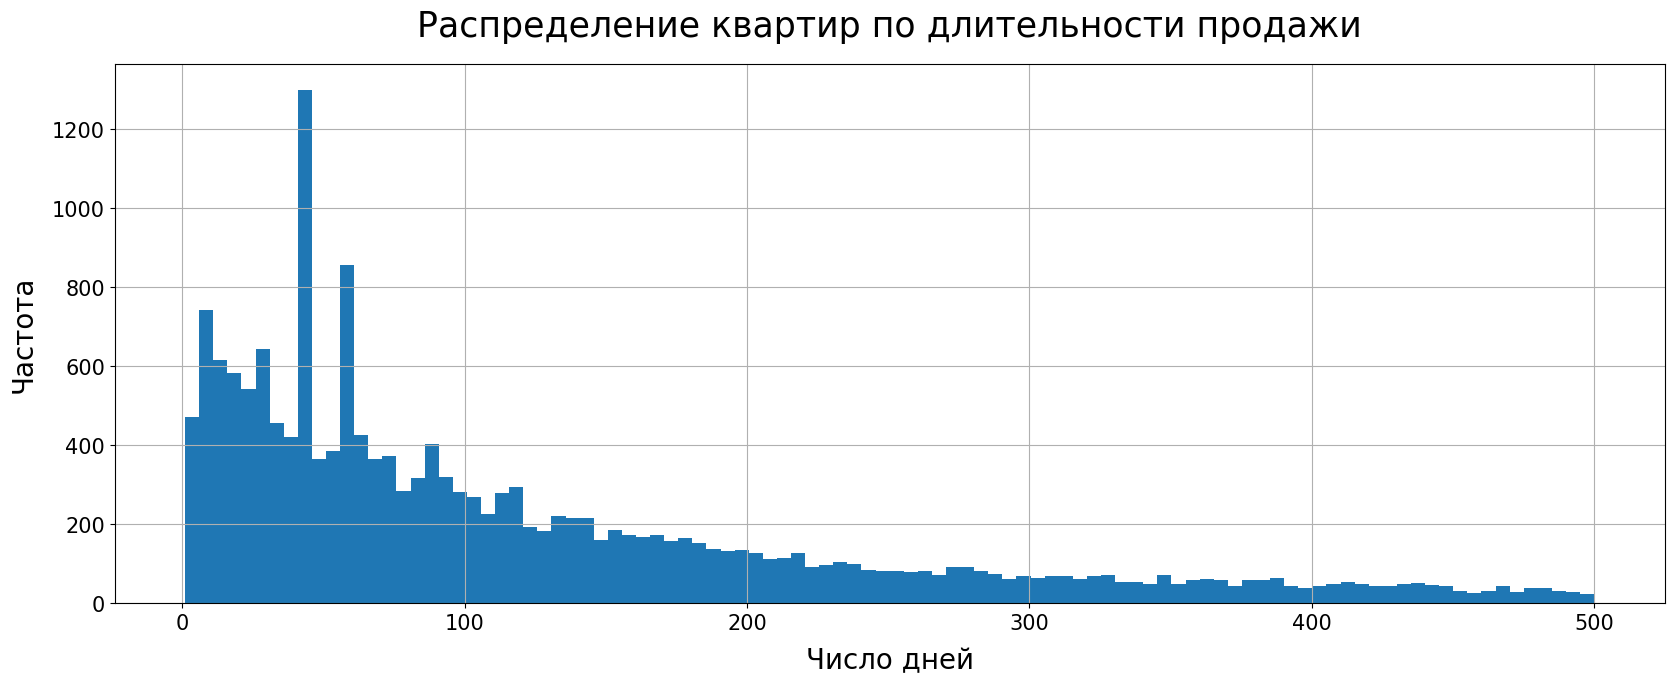

In [226]:
# смотрим на распределение с учетом аномальных значений
data.query('0 <= days_exposition <= 500')['days_exposition'].hist(bins=(100), figsize=(20, 7), legend=False)

plt.xlabel('Число дней', labelpad=10, fontsize=20)
plt.ylabel('Частота', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение квартир по длительности продажи', pad=20, fontsize=25);

In [170]:
data.query('0 <= days_exposition <= 500')['days_exposition'].describe()

count    17809.000000
mean       125.149531
std        118.118238
min          1.000000
25%         40.000000
50%         82.000000
75%        179.000000
max        500.000000
Name: days_exposition, dtype: float64

Чаще всего квартиры продаются в течение до 100 дней; продажи, превышающие 200 дней, можно считать необычно долгими. На графике заметны выбросы в районе 45, 60 и 90 дней, которые могут указывать на автоматическое снятие объявления с площадки.

#### Узнаем, какие факторы больше всего влияют на общую (полную) стоимость объекта

##### Зависимость цены от общей площади 

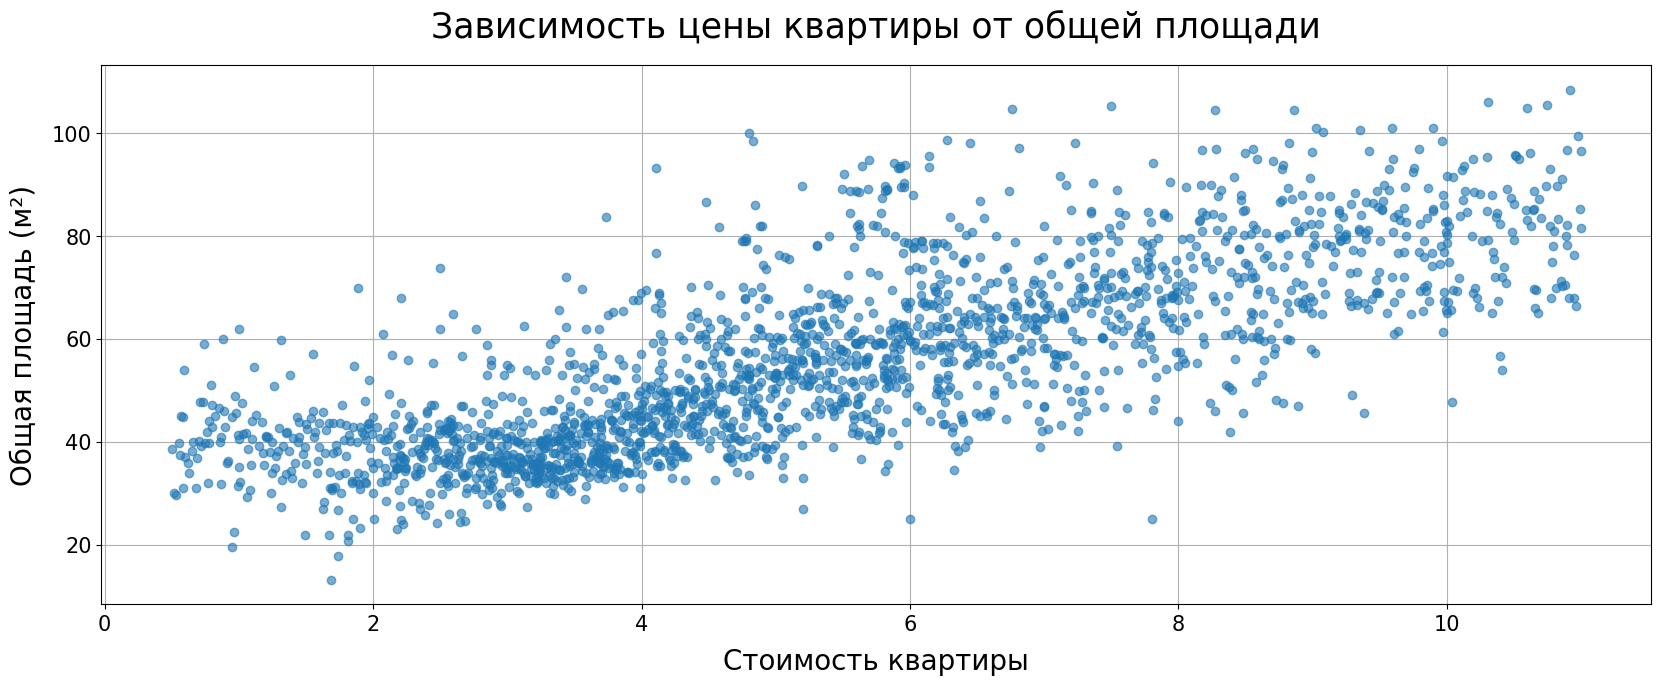

In [233]:
data.query('0.5 <= last_price_mln <= 11 and 10 <= total_area <= 110').pivot_table(
    index='last_price_mln', values='total_area', aggfunc='mean').plot(
    y='total_area', grid=True, figsize=(20, 7), style='o', alpha=0.6, legend=False);

plt.xlabel('Стоимость квартиры', labelpad=10, fontsize=20)
plt.ylabel('Общая площадь (м²)', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Зависимость цены квартиры от общей площади', pad=20, fontsize=25);

In [172]:
data.query('0.5 <= last_price_mln <= 11')['last_price_mln'].corr(data.query('10 <= total_area <= 110')['living_area'])

0.5586197833145559

Замечена чёткая зависимость цены от общей площади: чем больше площадь, тем выше цена.

#####  Зависимость цены от жилой площади 

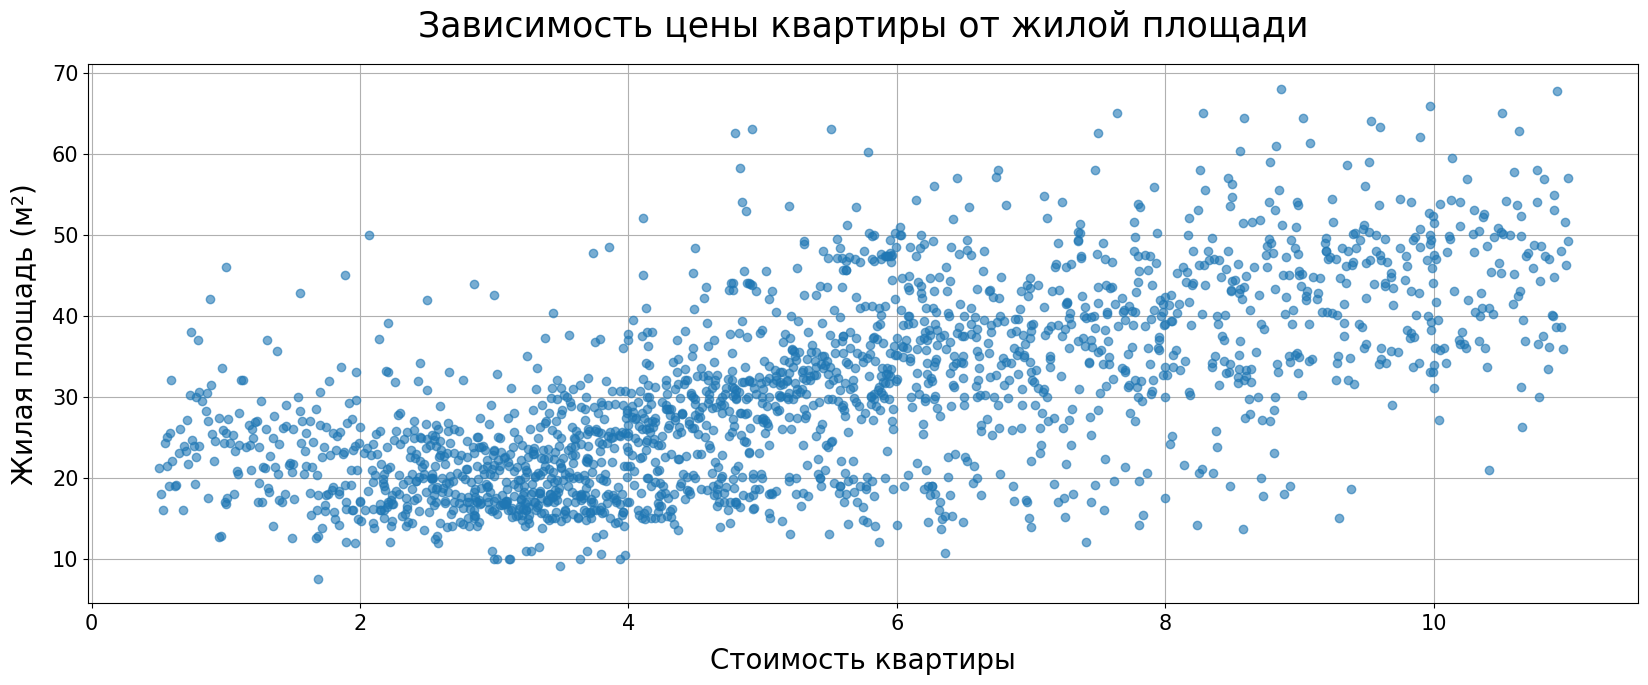

In [235]:
data.query('0.5 <= last_price_mln <= 11 and 3 <= living_area <= 70').pivot_table(
    index='last_price_mln', values='living_area', aggfunc='mean').plot(
    y='living_area', grid=True, figsize=(20, 7), style='o',  alpha=0.6, legend=False);

plt.xlabel('Стоимость квартиры', labelpad=10, fontsize=20)
plt.ylabel('Жилая площадь (м²)', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Зависимость цены квартиры от жилой площади', pad=20, fontsize=25);

In [174]:
data.query('0.5 <= last_price_mln <= 11')['last_price_mln'].corr(data.query('3 <= living_area <= 70')['living_area'])

0.5581988398812181

Замечена явная зависимость цены от жилой площади: чем больше жилая площадь, тем выше цена.

#####  Зависимость цены от площади кухни

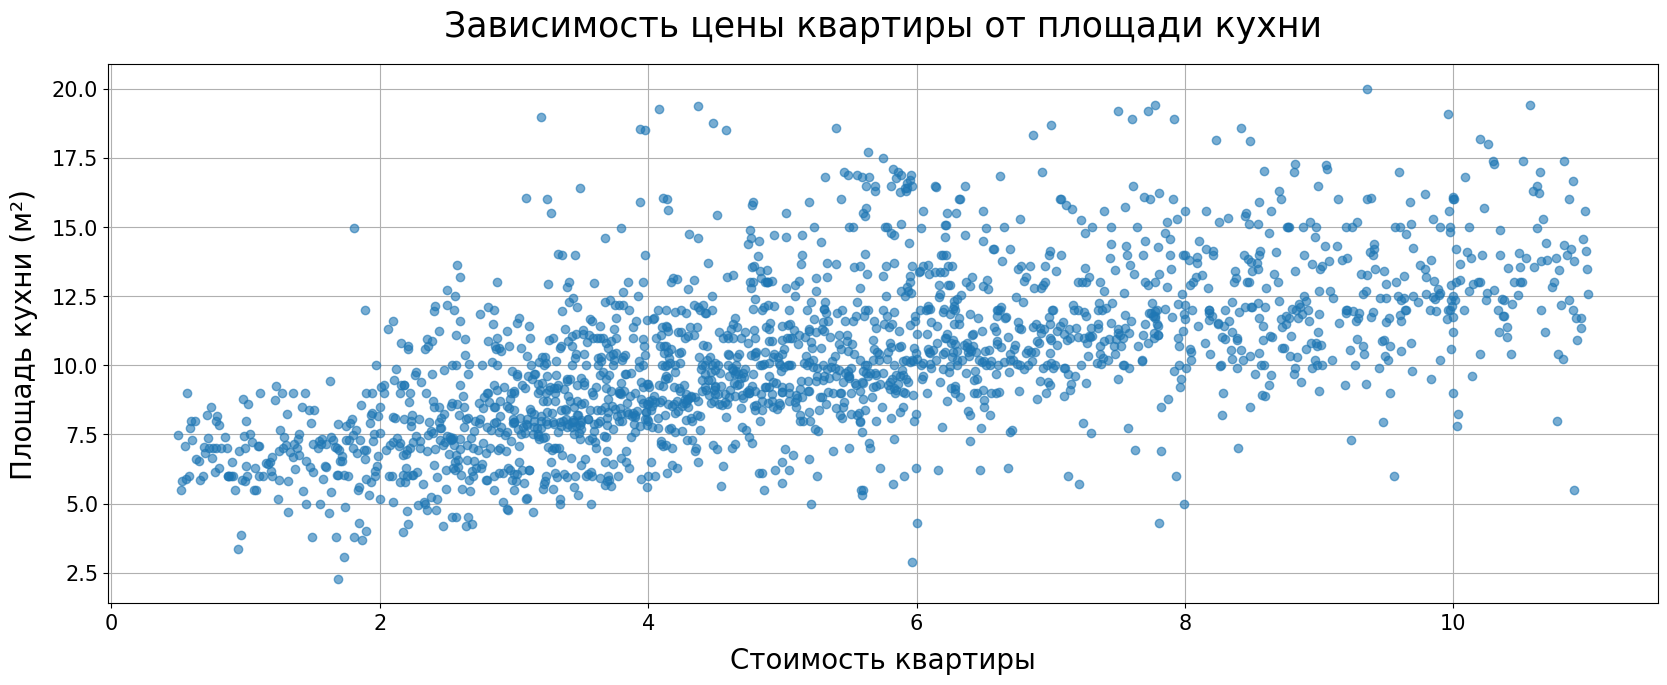

In [239]:
data.query('0.5 <= last_price_mln <= 11 and 1 <= kitchen_area <= 20').pivot_table(
    index='last_price_mln', values='kitchen_area', aggfunc='mean').plot(
    y='kitchen_area', grid=True, figsize=(20, 7), style='o',  alpha=0.6, legend=False);

plt.xlabel('Стоимость квартиры', labelpad=10, fontsize=20)
plt.ylabel('Площадь кухни (м²)', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Зависимость цены квартиры от площади кухни', pad=20, fontsize=25);

In [176]:
data.query('0.5 <= last_price_mln <= 11')['last_price_mln'].corr(data.query('1 <= kitchen_area <= 20')['living_area'])

0.5732581262036444

Замечена зависимость цены от кухонной площади: чем больше кухонная площадь, тем выше цена.

#####  Зависимость цены от числа комнат

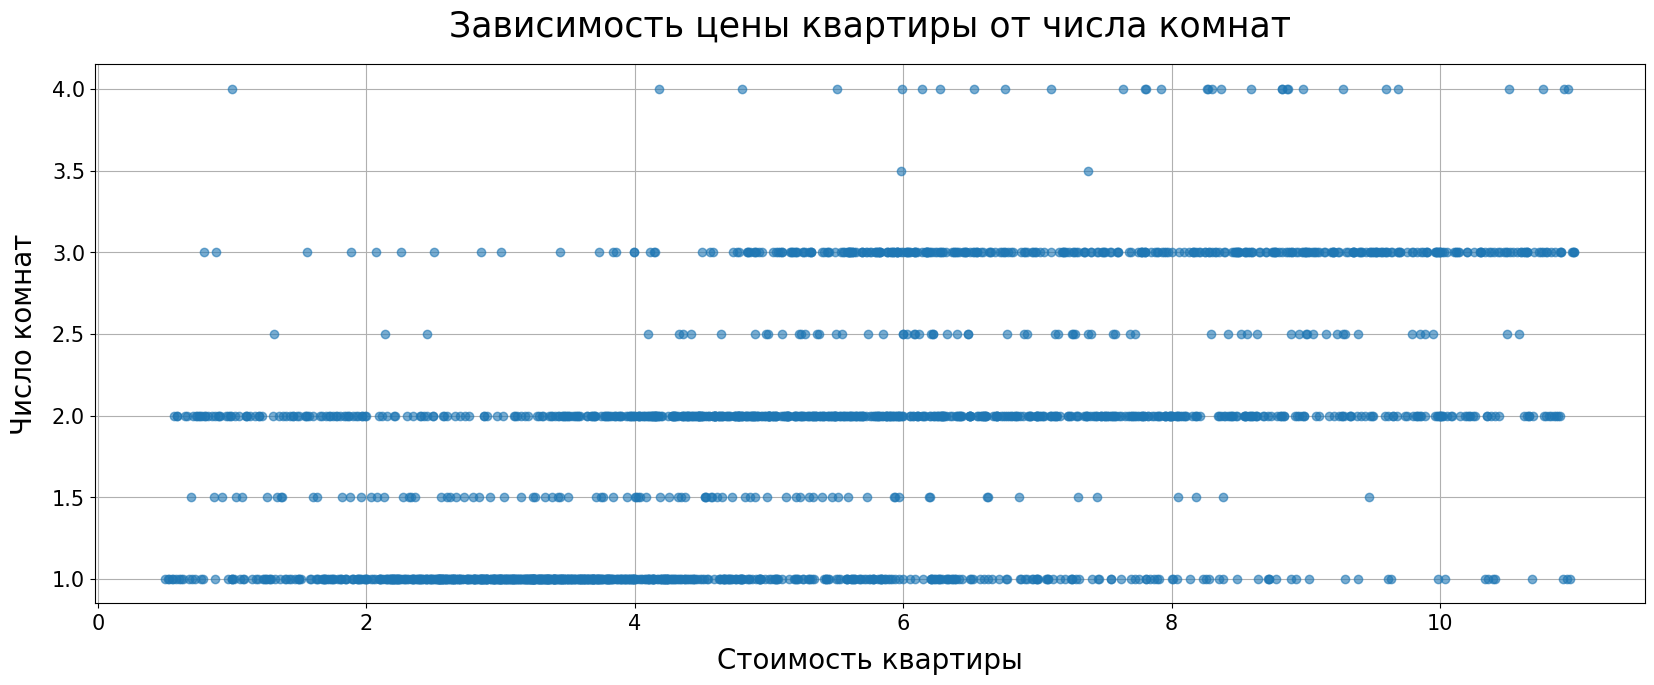

In [242]:
data.query('0.5 <= last_price_mln <= 11 and 0 < rooms').pivot_table(
    index='last_price_mln', values='rooms', aggfunc='median').plot(
    y='rooms', grid=True, figsize=(20, 7), style='o',  alpha=0.6, legend=False)

plt.xlabel('Стоимость квартиры', labelpad=10, fontsize=20)
plt.ylabel('Число комнат', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Зависимость цены квартиры от числа комнат', pad=20, fontsize=25);

Замечена зависимость цены от количества комнат (от трёх до шести): чем больше комнат, тем выше цена. Квартиры с 1 и 2 комнатами могут иметь схожую цену. Квартиры с 1 комнатой редко стоят больше 8 миллионов рублей, чего нельзя сказать о квартирах с большим количеством комнат. Квартиры с двумя комнатами варьируются по цене от 1 до 12 миллионов рублей, но их редко можно встретить по цене ниже 4 миллионов, в отличие от трёхкомнатных квартир. Трёхкомнатные квартиры почти не продаются по цене ниже 4 миллионов, так же как и четырёхкомнатные квартиры.

#####  Зависимость цены от типа этажа

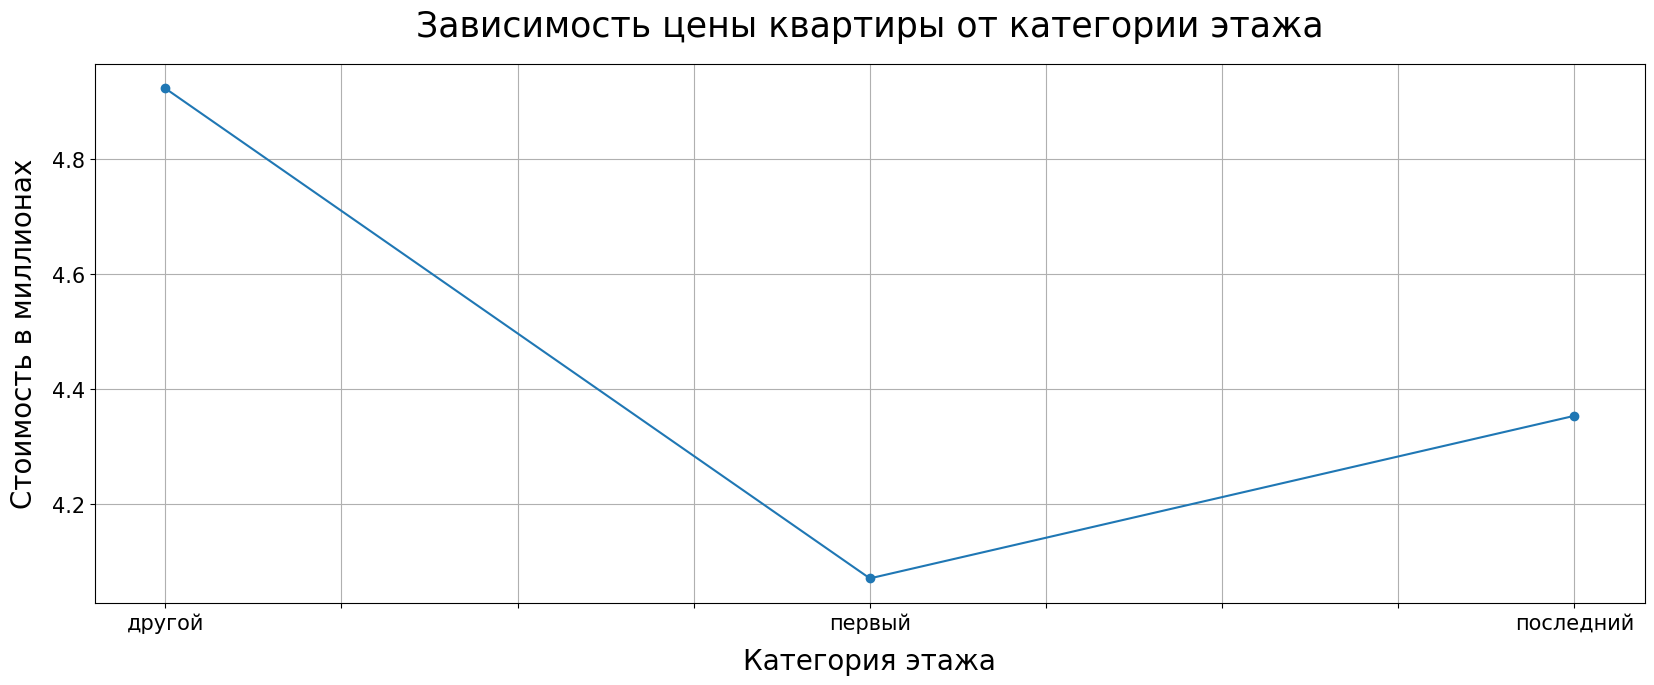

In [243]:
data.query('0.5 <= last_price_mln <= 11').pivot_table(
    index='floor_type', values='last_price_mln', aggfunc=['mean']).plot(
    y ='mean', grid=True, figsize=(20, 7), style=('-o'), legend=False);

plt.xlabel('Категория этажа', labelpad=10, fontsize=20)
plt.ylabel('Стоимость в миллионах', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Зависимость цены квартиры от категории этажа', pad=20, fontsize=25);

Обнаружена чёткая зависимость цены от этажа квартиры: самые дешёвые — на первом этаже, за ними следуют квартиры на последнем этаже, а наибольшую ценность имеют квартиры, расположенные между первым и последним этажом.

#####  Зависимость цены от дня недели

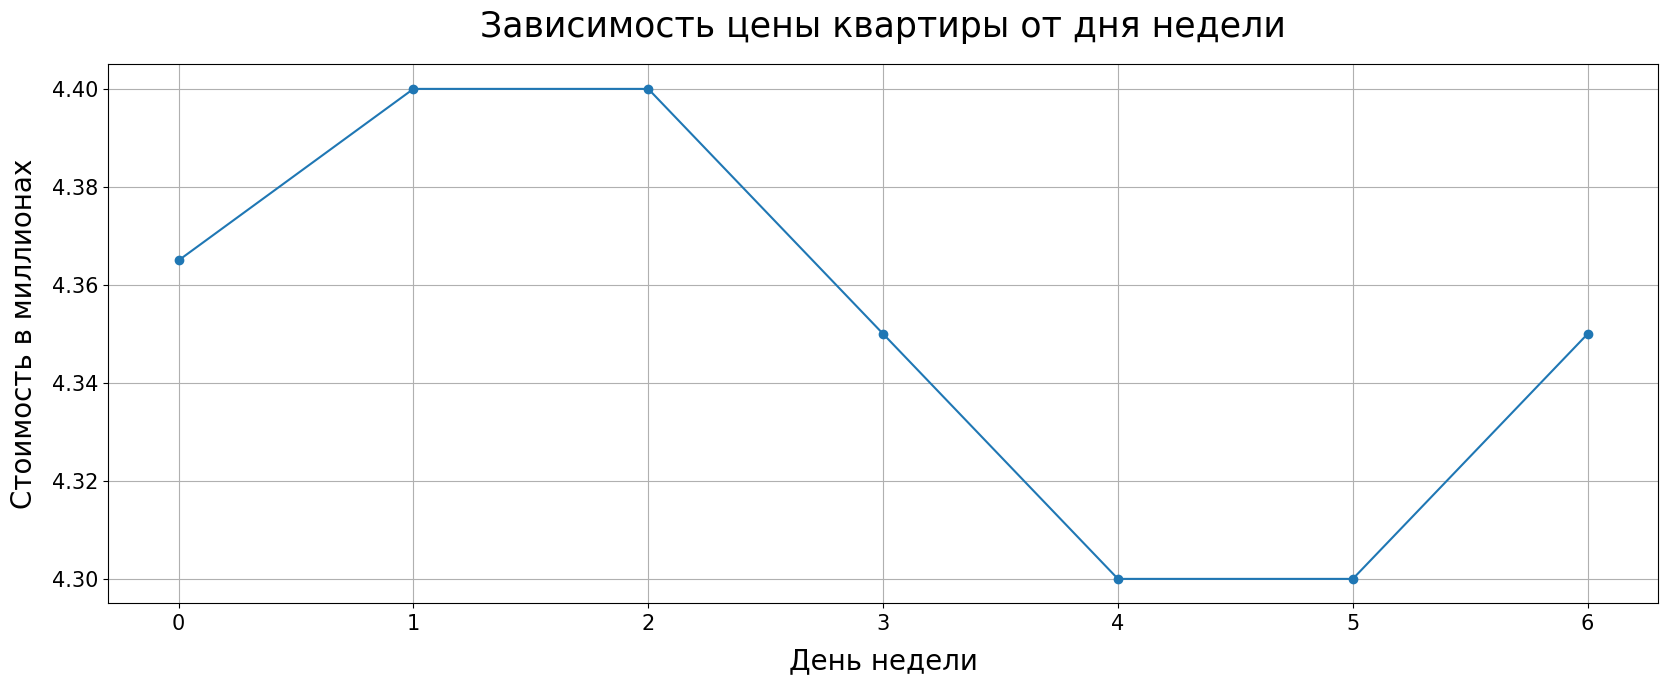

In [244]:
data.query('0.5 <= last_price_mln <= 11').pivot_table(
    index='week_day', values='last_price_mln', aggfunc='median').plot(
    y='last_price_mln', grid=True, figsize=(20, 7), style=('-o'), legend=False);

plt.xlabel('День недели', labelpad=10, fontsize=20)
plt.ylabel('Стоимость в миллионах', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Зависимость цены квартиры от дня недели', pad=20, fontsize=25);

Обнаружена корреляция между днём публикации объявления и ценой: в понедельник, вторник и среду цены самые высокие, затем снижаются в четверг и пятницу, с небольшим всплеском в субботу и падением в воскресенье.

Высокие цены в начале недели могут быть связаны с повышенным вниманием покупателей. Снижение цен в середине недели может отражать уменьшение активности покупателей. В выходные дни, когда активность снижена, цены могут снижаться для стимуляции интереса, несмотря на небольшой всплеск в субботу.

#####  Зависимость цены от месяца

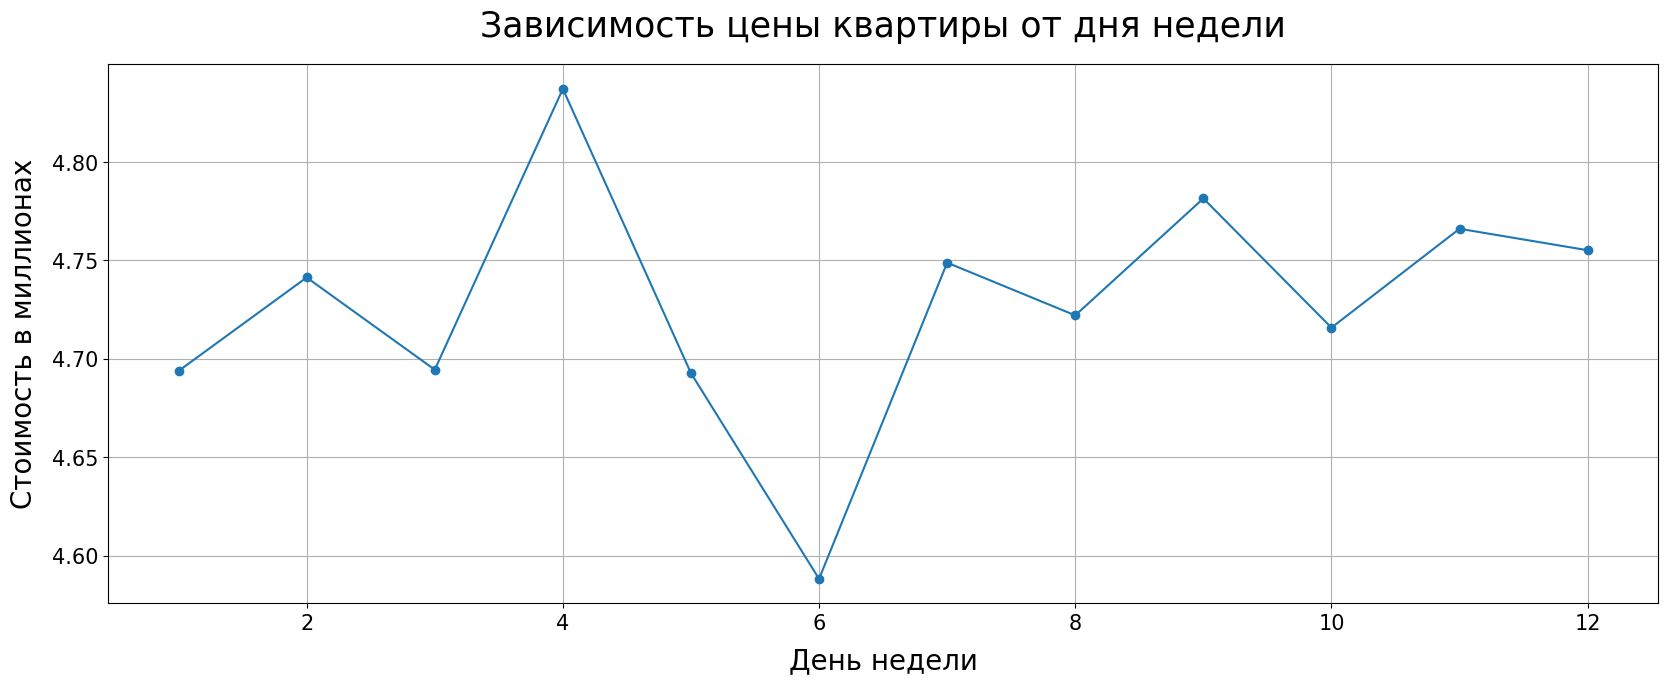

In [245]:
data.query('0.5 <= last_price_mln <= 11').pivot_table(
    index='month', values='last_price_mln', aggfunc='mean').plot(
    y='last_price_mln', grid=True, figsize=(20, 7), style=('-o'), legend=False);

plt.xlabel('День недели', labelpad=10, fontsize=20)
plt.ylabel('Стоимость в миллионах', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Зависимость цены квартиры от дня недели', pad=20, fontsize=25);

Дороже всего квартиры в апреле перед летним отдыхом, в то время как в первые месяцы лета их цена снижается, что объясняется снижением активности на рынке недвижимости, так как многие люди уезжают в отпуск. К концу лета цена стабилизируется и сохраняется на одном уровне до следующей весны.

#####  Зависимость цены от года

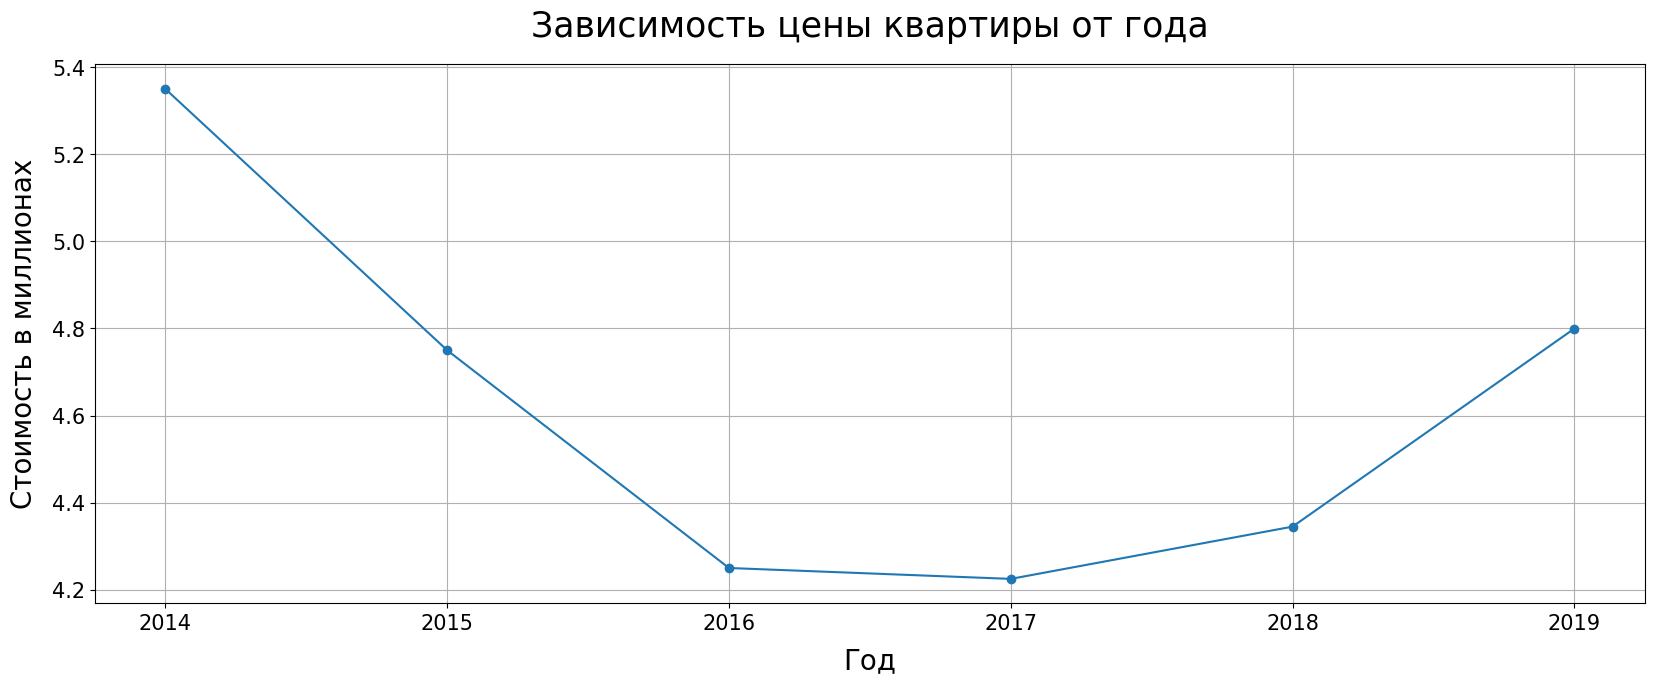

In [246]:
data.query('0.5 <= last_price_mln <= 11').pivot_table(
    index='year', values='last_price_mln', aggfunc='median').plot(
    y='last_price_mln', grid=True, figsize=(20, 7), style=('-o'), legend=False);

plt.xlabel('Год', labelpad=10, fontsize=20)
plt.ylabel('Стоимость в миллионах', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Зависимость цены квартиры от года', pad=20, fontsize=25);

Заметен явный упадок цен в 2016-2018 годах, что связано с повышенным предложением жилья на рынке. В последующие годы ситуация выравнивается, что соответствует графику предложения: чем больше предложений, тем ниже цена.

#### Cредняя цена квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [182]:
# создадим список населенных пунктов с наибольшим числом объявлений
top_ten_price = list(data['locality_name'].value_counts().head(10).index)

# считаем среднюю цену
data.query('locality_name in @top_ten_price').pivot_table(
    index='locality_name', values='price_1sqm').sort_values(by='price_1sqm').reset_index();

Населённые пункты с самой высокой и низкой стоимостью квадратного метра:

- Самая высокая стоимость: Санкт-Петербург — 108,426 руб. за квадратный метр.
- Самая низкая стоимость: Выборг — 57,790 руб. за квадратный метр.

#### Cредняя цена километра до центра Санкт-Петербурга

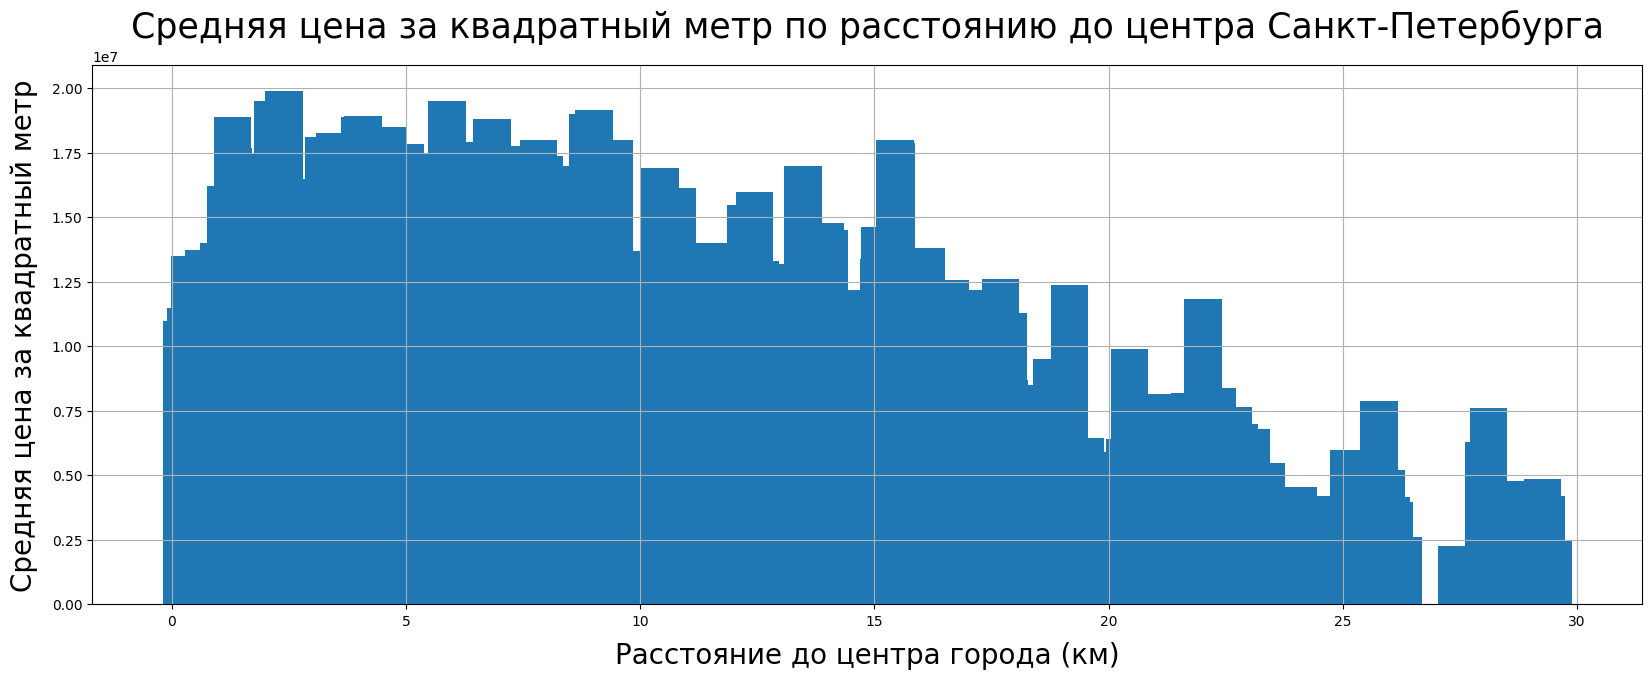

In [247]:
average_price_per_km = data.query('locality_name == "Санкт-Петербург"').pivot_table(
    index='city_centers_km', values='last_price').reset_index()

plt.figure(figsize=(20, 7))
plt.bar(average_price_per_km['city_centers_km'], average_price_per_km['last_price'])
plt.xlabel('Расстояние до центра города (км)', labelpad=10, fontsize=20)
plt.ylabel('Средняя цена за квадратный метр', labelpad=10, fontsize=20)
plt.title('Средняя цена за квадратный метр по расстоянию до центра Санкт-Петербурга', pad=20, fontsize=25)
plt.grid(True)
#plt.tight_layout()
plt.show();

Чем ближе к центру, тем выше цена объекта. В пределах 10 километров цена держится примерно на одном уровне, после 10 километров заметен спад. Около 25-30 км цена увеличивается и затем снова снижается.

### Общий вывод

**При изучении датасета были выполнены следующие действия:**

- **Заменены пропуски**: Пропуски были заполнены релевантными значениями.
- **Исправлены типы данных**: Некорректные типы данных были приведены в соответствие с их семантикой.
- **Удалены неявные дубликаты в названиях населённых пунктов**: Все дубликаты были устранены, и использованы уникальные названия.

**Были добавлены следующие столбцы**:

- **Данные по дням недели, месяцам и годам публикации**: Добавлены столбцы, отражающие день недели, месяц и год публикации объявления.
- **Расстояние до центра города**: Добавлен столбец с информацией о расстоянии до центра города.

**Выявленные закономерности в датасете**:
- **Средняя цена**: Наиболее часто продаются квартиры за 3-5 миллионов рублей.
- **Площадь**: Чаще всего продаются квартиры площадью 30-60 квадратных метров.
- **Количество комнат**: Наибольшее количество продаж приходится на квартиры с 1-3 комнатами.
- **Высота потолков**: Наибольшее число квартир имеет высоту потолков от 2.5 до 2.7 метров.
- **Этажность зданий**: Чаще всего продаются квартиры в пяти- и девятиэтажных зданиях.
- **Жилая площадь**: Больше всего продается квартир с жилой площадью 15-18 квадратных метров.
- **Этаж**: Наибольшее количество продаж приходится на квартиры на 1-5 этажах.
- **Расстояние до центра**: Большинство квартир находится на расстоянии 10-16 километров от центра города.
- **Срок продажи**: Чаще всего квартиры продаются в течение до 100 дней.

**Параметры, влияющие на цену квартиры**:

- **Центр города**: Чем ближе квартира к центру, тем выше её цена.
- **Площадь**: Увеличение площади квартиры (как жилой, так и нежилой) ведет к увеличению её цены.
- **Этаж**: Квартиры на первом этаже стоят значительно дешевле, чем на других этажах.
- **Количество комнат**: Число комнат также влияет на цену: чем больше комнат, тем выше цена.